<center> <h1 style="background-color:firebrick; color:white" >House Price</h1> 

<center><img
src="https://smallcaps.com.au/wp-content/uploads/2020/07/Property-market-fall-Australia-COVID-19-2020.jpg" style="width:90%;height:40%;">
</center>
    
<br>    
    
<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" style="background-color:firebrick; color:white" data-toggle="list"  role="tab" aria-controls="home">Notebook Content!</h3>  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#libraries" role="tab" aria-controls="profile" style="color:firebrick">Import Libraries<span class="badge badge-primary badge-pill" style="background-color:orangered; color:white">1</span></a>
  <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#load" role="tab" aria-controls="messages" style="color:firebrick">Load Data<span class="badge badge-primary badge-pill" style="background-color:orangered; color:white">2</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#missing" role="tab" aria-controls="settings" style="color:firebrick">Missing Values<span class="badge badge-primary badge-pill" style="background-color:orangered; color:white">3</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#ordinal" role="tab" aria-controls="settings" style="color:firebrick">Ordinal Variables<span class="badge badge-primary badge-pill" style="background-color:orangered; color:white">4</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#correlation" role="tab" aria-controls="settings" style="color:firebrick">Correlation<span class="badge badge-primary badge-pill" style="background-color:orangered; color:white">5</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#numeric" role="tab" aria-controls="settings" style="color:firebrick">Numeric Variables<span class="badge badge-primary badge-pill" style="background-color:orangered; color:white">6</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#categoric" role="tab" aria-controls="settings" style="color:firebrick">Categoric Variables<span class="badge badge-primary badge-pill" style="background-color:orangered; color:white">7</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#fe" role="tab" aria-controls="settings" style="color:firebrick">Feature Engineering<span class="badge badge-primary badge-pill" style="background-color:orangered; color:white">8</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#year" role="tab" aria-controls="settings" style="color:firebrick">Label & One-Hot Encoder<span class="badge badge-primary badge-pill" style="background-color:orangered; color:white">9</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#lgbm" role="tab" aria-controls="settings" style="color:firebrick">Light GBM<span class="badge badge-primary badge-pill" style="background-color:orangered; color:white">10</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#tuning" role="tab" aria-controls="settings" style="color:firebrick">Model Tuning - Random Search<span class="badge badge-primary badge-pill" style="background-color:orangered; color:white">11</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#error" role="tab" aria-controls="settings" style="color:firebrick">Error Analysis<span class="badge badge-primary badge-pill" style="background-color:orangered; color:white">11</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#final" role="tab" aria-controls="settings" style="color:firebrick">Final Model & Submission<span class="badge badge-primary badge-pill" style="background-color:orangered; color:white">13</span></a> 

<a id='libraries'></a>
<h1 style="color:firebrick" >1. PACKAGES</h1>

In [1]:
# Base 
# -----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Missing Values 
# -----------------------------------
# !pip install missingno
import missingno as msno

# Models 
# -----------------------------------
import lightgbm as lgb

# Metrics & Evaluation
# -----------------------------------
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# MAPE
# -----------------------------------
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Configuration
# -----------------------------------
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

<a id='load'></a>
<h1 style="color:firebrick" >2. DATA</h1>

In [2]:
# Import
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

# Bind rows
df = train.append(test)



# Num of dtypes
print("Num of Object Variables:", df.select_dtypes(object).shape[1])
print("Num of Integer Variables:", df.select_dtypes("integer").shape[1])
print("Num of Float Variables:", df.select_dtypes("float").shape[1])

# Dimensions
df.shape, train.shape, test.shape

Num of Object Variables: 43
Num of Integer Variables: 26
Num of Float Variables: 12


((2919, 81), (1460, 81), (1459, 80))

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706.00,Unf,0.00,150.00,856.00,GasA,Ex,Y,SBrkr,856,854,0,1710,1.00,0.00,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2.00,548.00,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.00
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.00,Unf,0.00,284.00,1262.00,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.00,1.00,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2.00,460.00,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.00
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.00,Unf,0.00,434.00,920.00,GasA,Ex,Y,SBrkr,920,866,0,1786,1.00,0.00,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2.00,608.00,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.00
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216.00,Unf,0.00,540.00,756.00,GasA,Gd,Y,SBrkr,961,756,0,1717,1.00,0.00,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3.00,642.00,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.00
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655.00,Unf,0.00,490.00,1145.00,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.00,0.00,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3.00,836.00,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.00


<a id='missing'></a>
<h1 style="color:firebrick" >3. MISSING VALUES</h1>

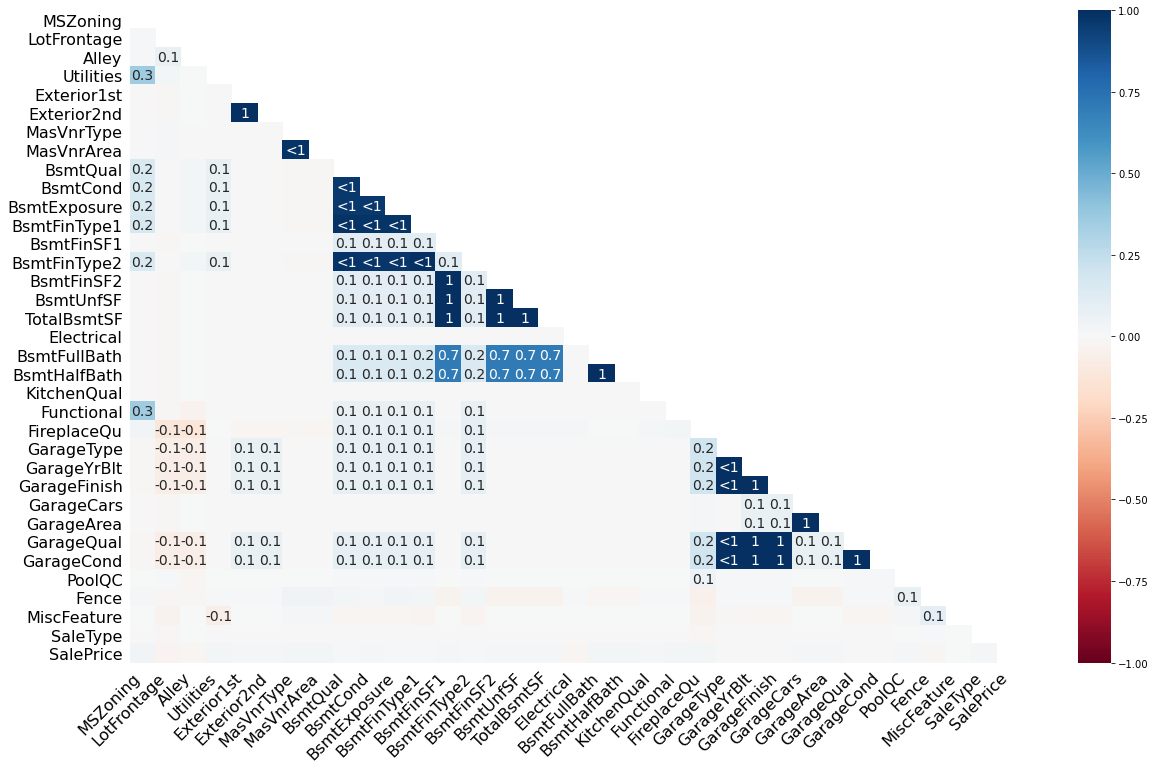

In [4]:
msno.heatmap(df)
plt.show()

Number of Variables include Missing Values: 34 

Full Missing Variables: ['PoolQC']
Full missing variables are deleted! 

         Feature  Num_Missing  Missing_Ratio DataTypes
0         PoolQC         2909           1.00    object
1    MiscFeature         2814           0.96    object
2          Alley         2721           0.93    object
3          Fence         2348           0.80    object
5    FireplaceQu         1420           0.49    object
6    LotFrontage          486           0.17   float64
7   GarageFinish          159           0.05    object
8     GarageQual          159           0.05    object
9     GarageCond          159           0.05    object
10   GarageYrBlt          159           0.05   float64
11    GarageType          157           0.05    object
12  BsmtExposure           82           0.03    object
13      BsmtCond           82           0.03    object
14      BsmtQual           81           0.03    object
15  BsmtFinType2           80           0.03    objec

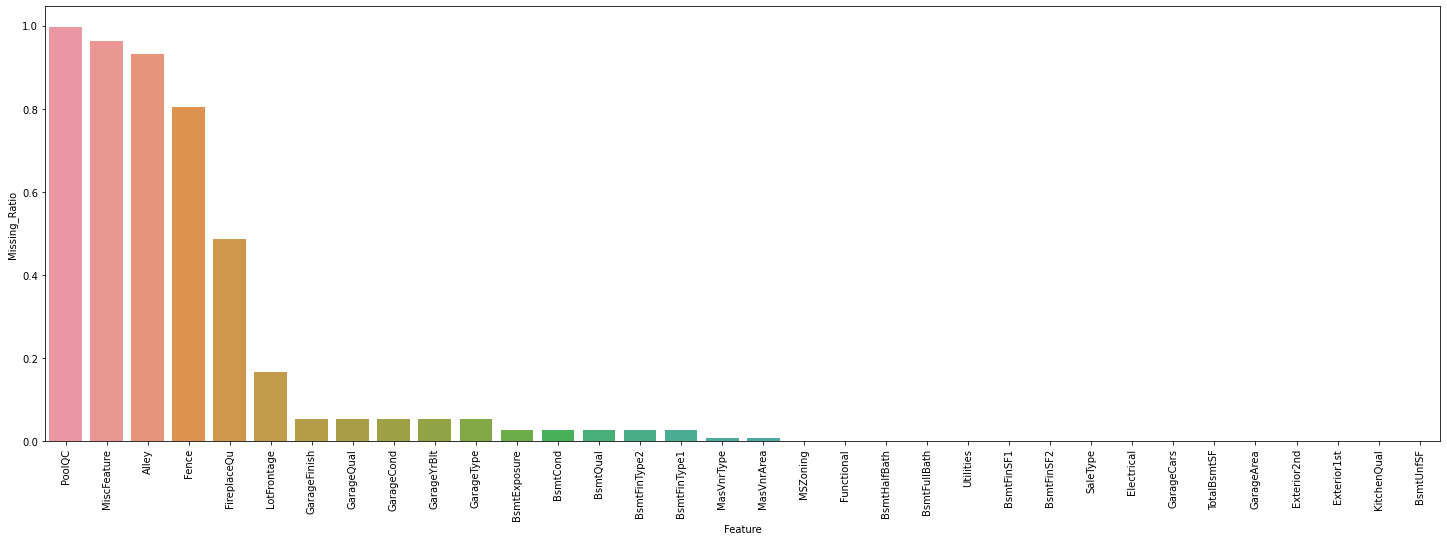

In [5]:
def missing_values(data, plot = False, target = "SalePrice"):
    
    mst = pd.DataFrame({"Num_Missing":df.isnull().sum(), "Missing_Ratio":df.isnull().sum() / df.shape[0]}).sort_values("Num_Missing", ascending = False)
    mst["DataTypes"] = df[mst.index].dtypes.values
    mst = mst[mst.Num_Missing > 0].reset_index().rename({"index":"Feature"}, axis = 1)
    mst = mst[mst.Feature != target]
    
    print("Number of Variables include Missing Values:", mst.shape[0], "\n")
    
    if mst[mst.Missing_Ratio > 0.99].shape[0] > 0:  
        print("Full Missing Variables:",mst[mst.Missing_Ratio > 0.99].Feature.tolist())
        data.drop(mst[mst.Missing_Ratio > 0.99].Feature.tolist(), axis = 1, inplace = True)

        print("Full missing variables are deleted!", "\n")

    if plot:
        plt.figure(figsize = (25, 8))    
        p = sns.barplot(mst.Feature, mst.Missing_Ratio)
        for rotate in p.get_xticklabels():
            rotate.set_rotation(90)
            
            
    print(mst, "\n")        
    
missing_values(df, plot = True, target = "SalePrice")

### Some categorical variables includes None category as missing value.

In [6]:
cat_missing = ["Alley", 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Fence', "MiscFeature",
               "FireplaceQu", "GarageFinish","GarageCond", "GarageQual", "GarageType", "MasVnrType"]
for i in cat_missing:
    df[i] = np.where(df[i].isnull(), "None", df[i])
    
missing_values(df, plot = False, target = "SalePrice")

Number of Variables include Missing Values: 19 

         Feature  Num_Missing  Missing_Ratio DataTypes
1    LotFrontage          486           0.17   float64
2    GarageYrBlt          159           0.05   float64
3     MasVnrArea           23           0.01   float64
4       MSZoning            4           0.00    object
5      Utilities            2           0.00    object
6   BsmtHalfBath            2           0.00   float64
7     Functional            2           0.00    object
8   BsmtFullBath            2           0.00   float64
9     GarageCars            1           0.00   float64
10     BsmtUnfSF            1           0.00   float64
11      SaleType            1           0.00    object
12   Exterior2nd            1           0.00    object
13   Exterior1st            1           0.00    object
14   KitchenQual            1           0.00    object
15    GarageArea            1           0.00   float64
16    BsmtFinSF1            1           0.00   float64
17    BsmtFinSF2

In [7]:
# If observation is NA in the GarageYrBlt variable, assign YearBuilt value.
df["GarageYrBlt"]= np.where((df.GarageYrBlt.isnull() == True) & (df.GarageArea == 0), df.YearBuilt,df.GarageYrBlt)

## Quick Missing Imputation (Mode & Median)

In [8]:
def quick_missing_imp(data, num_method = "median", cat_length = 20, target = "SalePrice"):
    variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]
    
    temp_target = data[target]
    
    print("# BEFORE")
    print(data[variables_with_na].isnull().sum(), "\n\n")
    
    data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)
        
    if num_method == "mean":
        data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
    elif num_method == "median":
        data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
        
    data[target] = temp_target
    
    print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
    print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
    print(data[variables_with_na].isnull().sum(), "\n\n")
        
    return data
        
df = quick_missing_imp(df, num_method = "median", cat_length = 17)

# BEFORE
MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageYrBlt        2
GarageCars         1
GarageArea         1
SaleType           1
SalePrice       1459
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

MSZoning           0
LotFrontage        0
Utilities          0
Exterior1st        0
Exterior2nd        0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Electrical         0
BsmtFullBath       0
BsmtHalfBath       0
KitchenQual        0
Functional         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
SaleType           0
SalePrice       1459
dtype: int64 


<a id='ordinal'></a>
<h1 style="color:firebrick" >4. ORDINAL VARIABLES</h1>

In [9]:
ordinal_vars = [
    "LotShape", "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual",
    "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional",
    "FireplaceQu", "GarageQual", "GarageCond", "Fence", "Electrical"
]

def ordinal(serie, category):
    numeric = np.arange(1, len(category)+1, 1)
    zip_iterator = zip(category, numeric)
    mapping = dict(zip_iterator)
    serie = serie.map(mapping)
    return serie


def transform_ordinal(data, ordinal_vars, category):
    
    for i in ordinal_vars:
        data[i] = ordinal(data[i], category = category)
        

        
# Same Categories        
transform_ordinal(
    df, 
    ordinal_vars = ["ExterQual", "ExterCond", "HeatingQC","KitchenQual"],
    category = ["Po", "Fa", "TA", "Gd" ,"Ex"]
)

transform_ordinal(
    df, 
    ordinal_vars = ["BsmtQual", "BsmtCond", "FireplaceQu","GarageCond", "GarageQual"],
    category = ["None", "Po", "Fa", "TA", "Gd","Ex"]
)

transform_ordinal(
    df, 
    ordinal_vars = ["BsmtFinType1", "BsmtFinType2"],
    category = ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ","GLQ"]
)

# Different
df["LotShape"] = ordinal(df["LotShape"], category = ["IR3", "IR2", "IR1","Reg"])
df["BsmtExposure"] = ordinal(df["BsmtExposure"], category = ["None", "No", "Mn", "Av","Gd"])
df["Functional"] = ordinal(df["Functional"], category = ["Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1","Typ"])
df["Fence"] = ordinal(df["Fence"], category = ["None", "MnWw", "GdWo", "MnPrv","GdPrv"])

df["Electrical"] = ordinal(df["Electrical"], category = ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'])

print("Ordinal transformation completed!")

Ordinal transformation completed!


<a id='correlation'></a>
<h1 style="color:firebrick" >5. CORRELATION</h1>

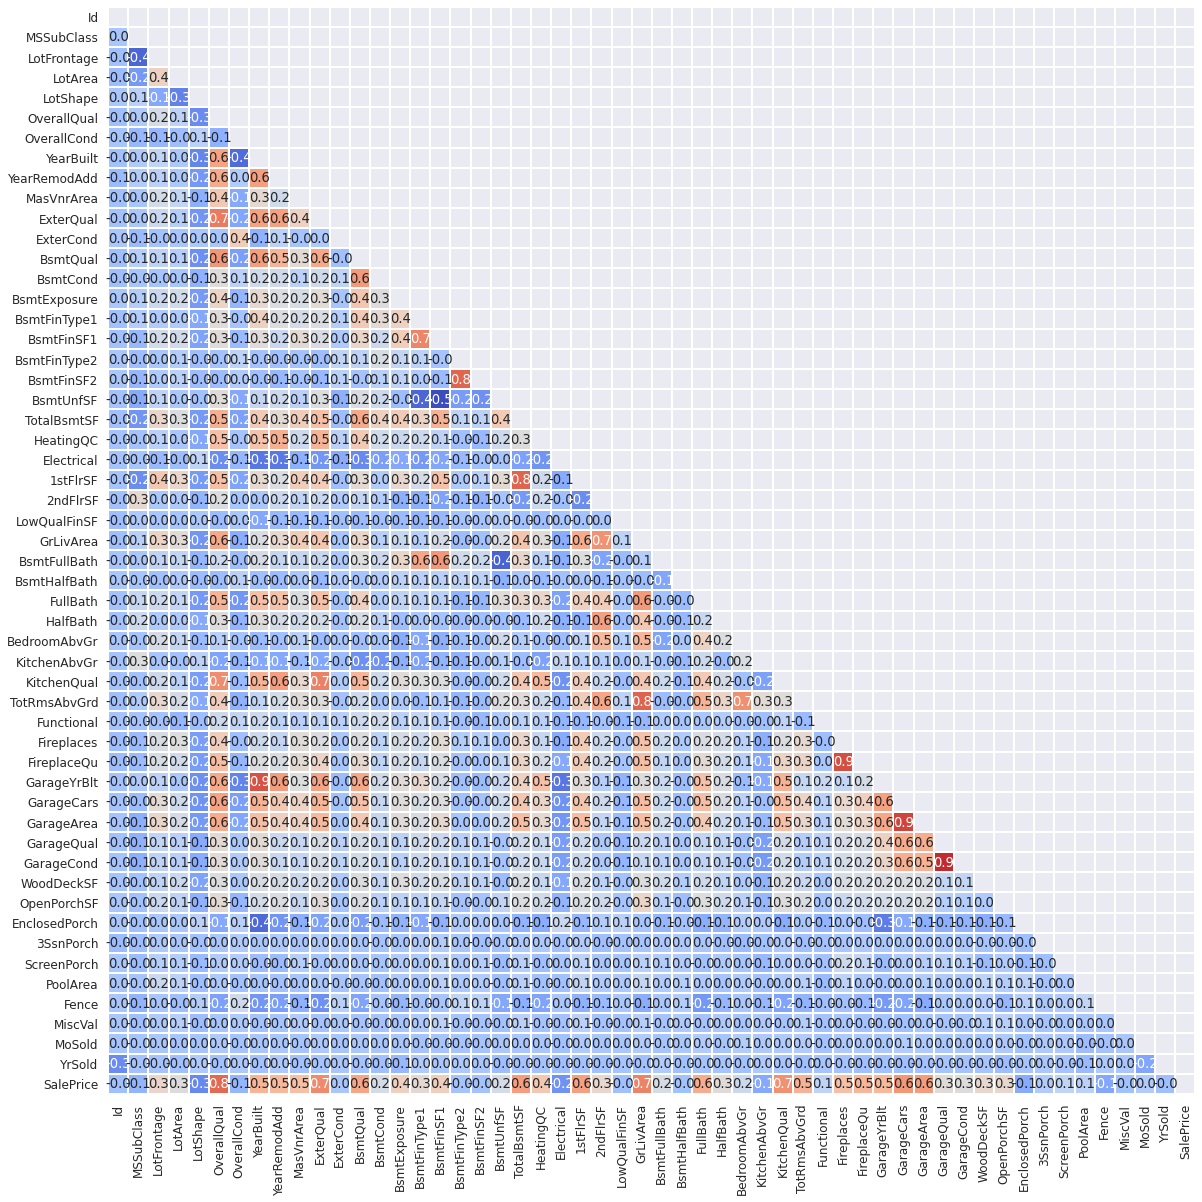

In [10]:
sns.set(font_scale=1.1)
c = df.corr()
mask = np.triu(c.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(c,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

## Simple Correlation Analysis

##################################
###### CORRELATION ANALYSIS ######
################################## 


DEPENDENT VARIABLES
----------------------------------
       Variables  Cor
0    OverallQual 0.79
1      GrLivArea 0.71
2      ExterQual 0.68
3    KitchenQual 0.66
4     GarageCars 0.64
5     GarageArea 0.62
6    TotalBsmtSF 0.61
7       1stFlrSF 0.61
8       BsmtQual 0.59
9       FullBath 0.56
10  TotRmsAbvGrd 0.53
11     YearBuilt 0.52
12   FireplaceQu 0.52
13   GarageYrBlt 0.51
14  YearRemodAdd 0.51 


Highly Correlated Variables: 
 ['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'FireplaceQu', 'GarageYrBlt', 'YearRemodAdd'] 


INDEPENDENT VARIABLES
----------------------------------
GrLivArea :
      Variables  Cor
0  TotRmsAbvGrd 0.81 


GarageCars :
    Variables  Cor
0  GarageArea 0.89 


GarageArea :
    Variables  Cor
0  GarageCars 0.89 


TotalBsmtSF :
 

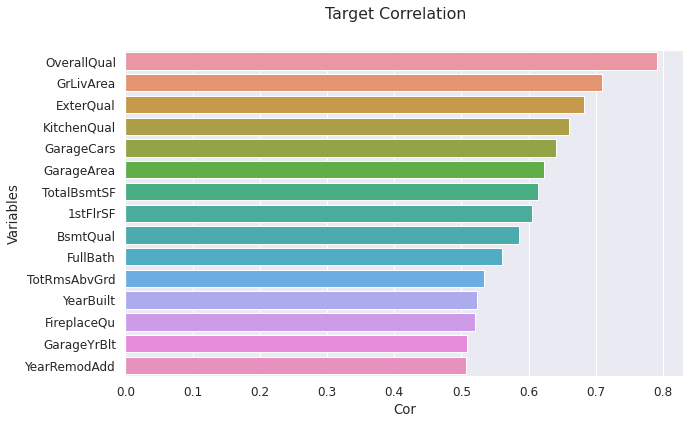

In [11]:
def find_linear(data, target, plot = False):

    c = data.corr()
    temp = c[target].sort_values(ascending = False).reset_index()
    temp = temp[temp["index"] != target]
    temp.columns = ["Variables", "Cor"]
    
    highly = temp[(temp["Cor"] > 0.5) | (temp["Cor"] < -0.5)].reset_index(drop = True)
    
    print("##################################")
    print("###### CORRELATION ANALYSIS ######")
    print("##################################", "\n\n")
    
    print("DEPENDENT VARIABLES")
    print("----------------------------------")
    print(highly, "\n\n")
    
    print("Highly Correlated Variables: \n", highly["Variables"].tolist(), "\n\n")
    
    
    print("INDEPENDENT VARIABLES")
    print("----------------------------------")
    for i in highly.Variables:
        c2 = c[i].sort_values(ascending = False).reset_index()
        c2 = c2[~c2["index"].isin([i,target])]
        c2.columns = ["Variables", "Cor"]
    
        cwith = c2[(c2["Cor"] >= 0.8) | (c2["Cor"] <= -0.8)].reset_index(drop = True)
        if len(cwith) > 0:
            print(i,":")
            print(cwith, "\n\n")
            
    if plot:       
        plt.figure(figsize = (10, 6))  
        p = sns.barplot(highly.Cor, highly["Variables"])
        plt.suptitle("Target Correlation")
            
find_linear(df, target = "SalePrice", plot = True)

<a id='numeric'></a>
<h1 style="color:firebrick" >6. NUMERIC VARIABLES</h1>

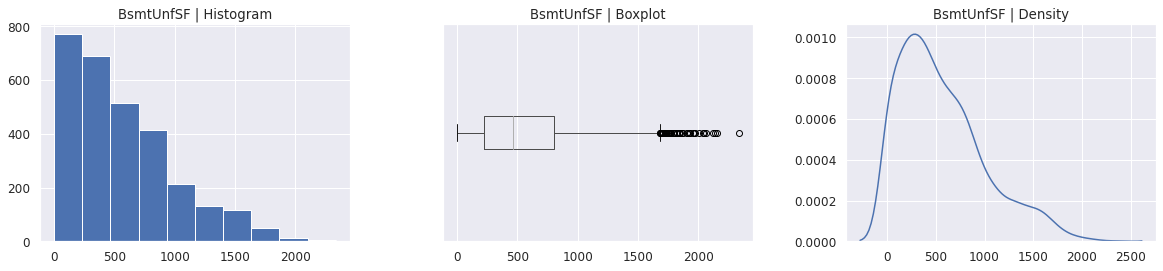

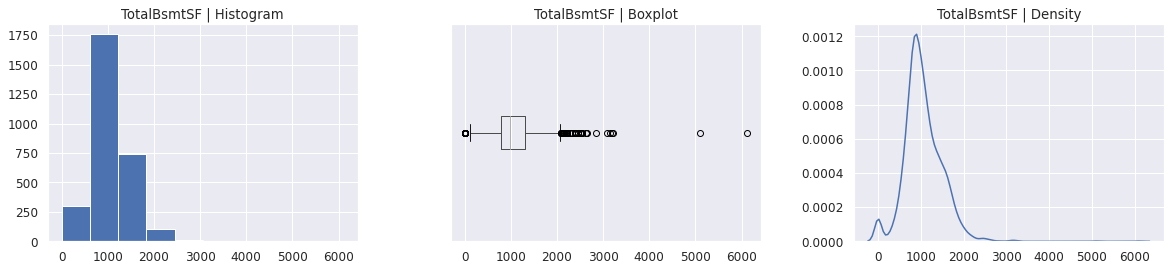

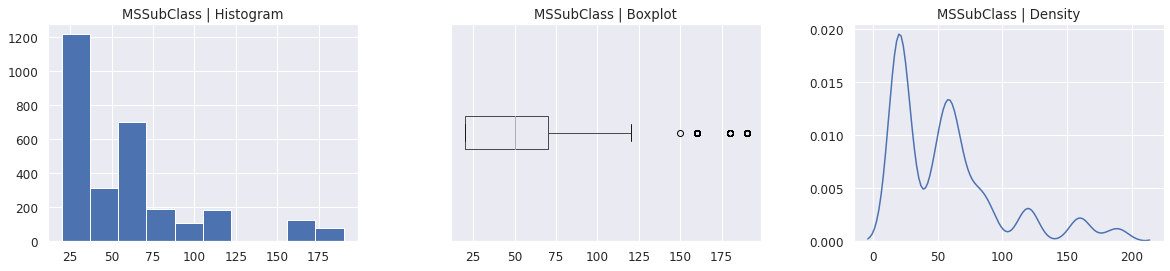

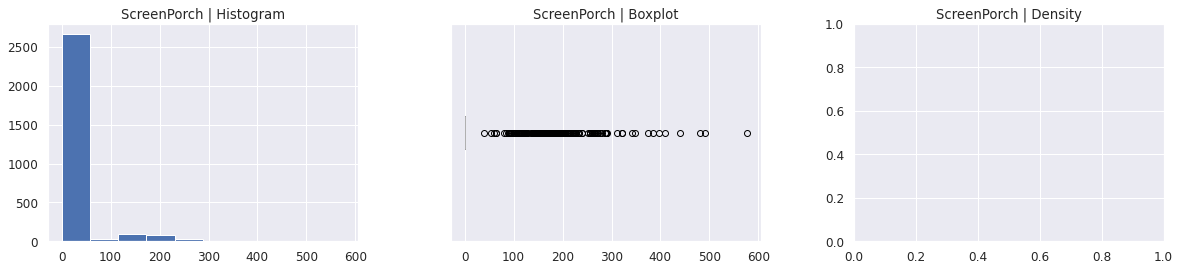

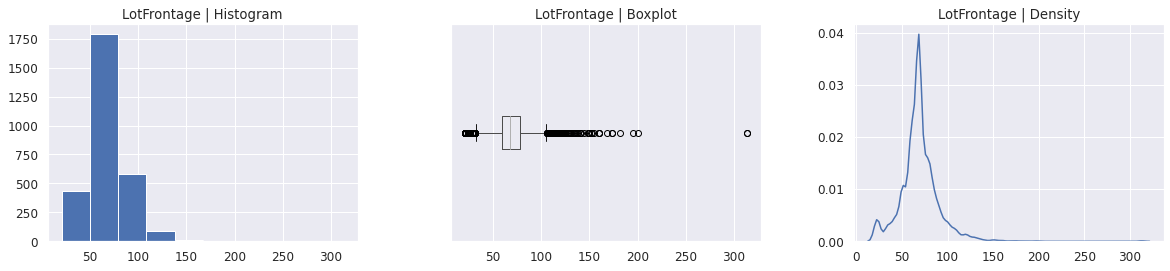

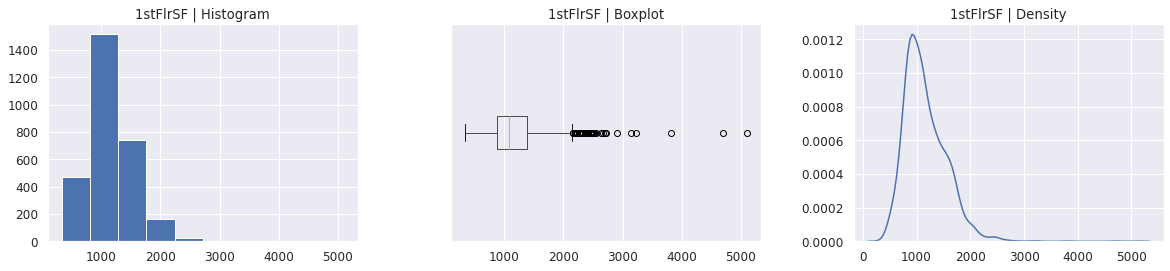

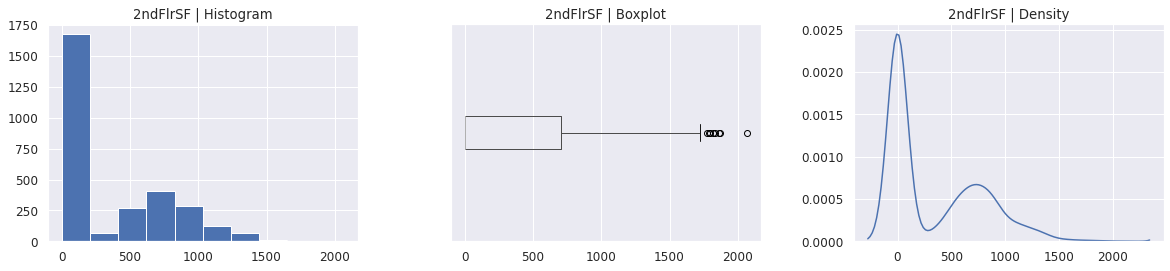

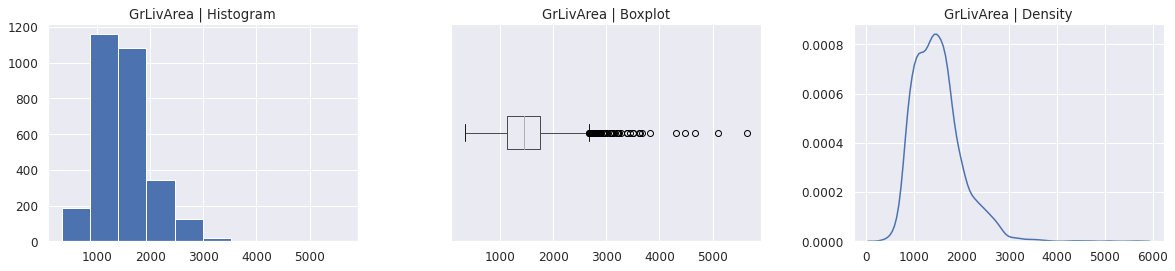

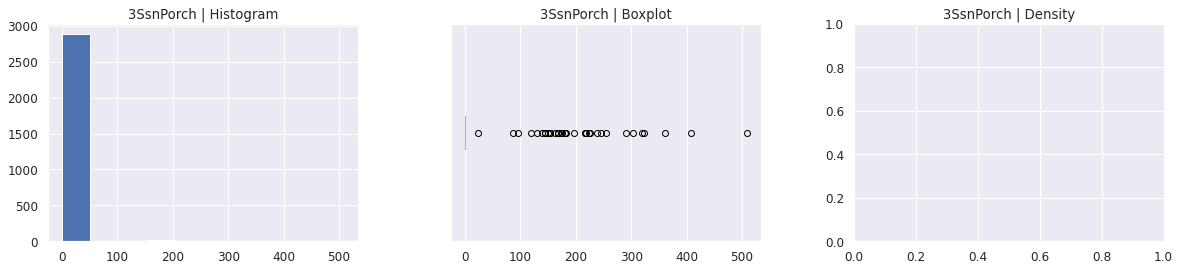

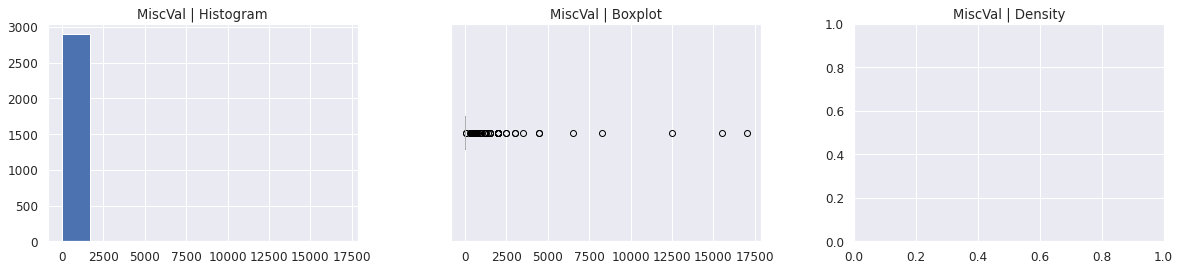

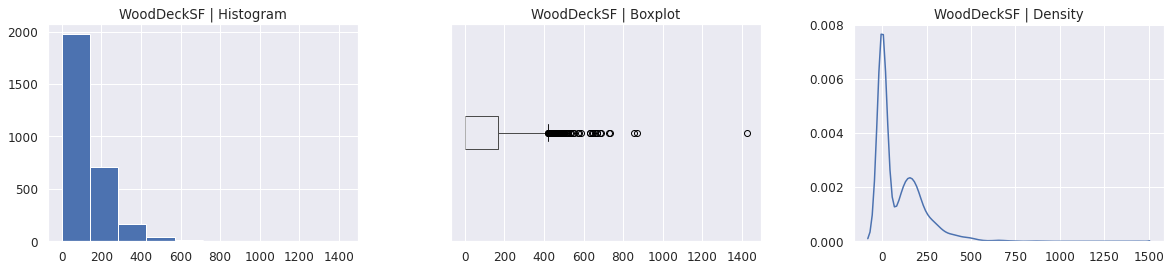

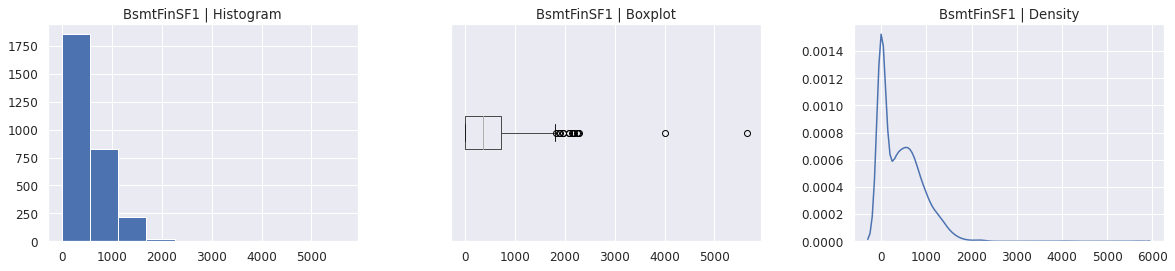

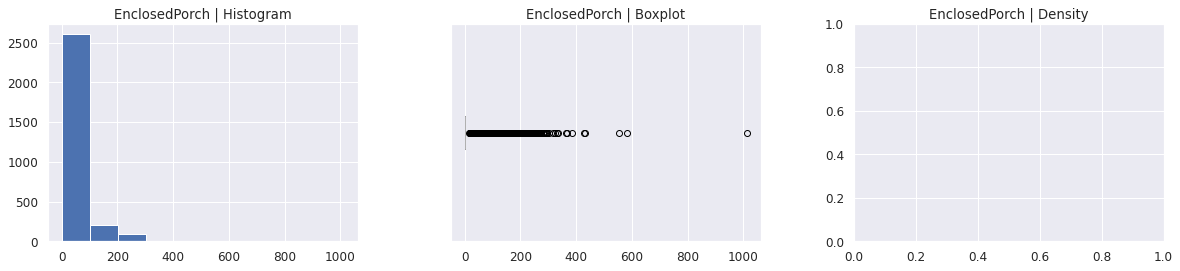

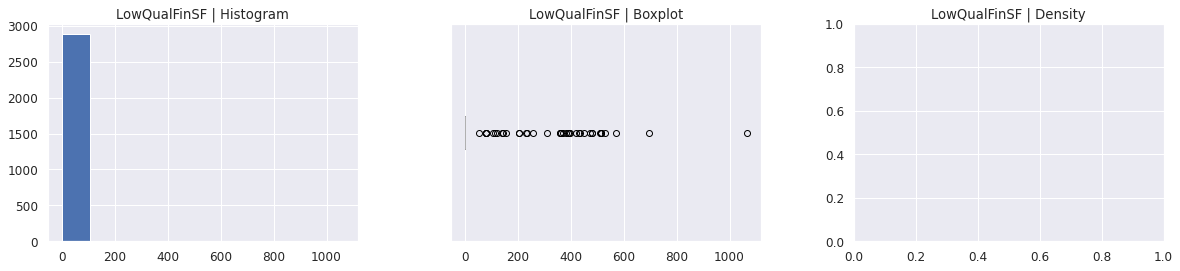

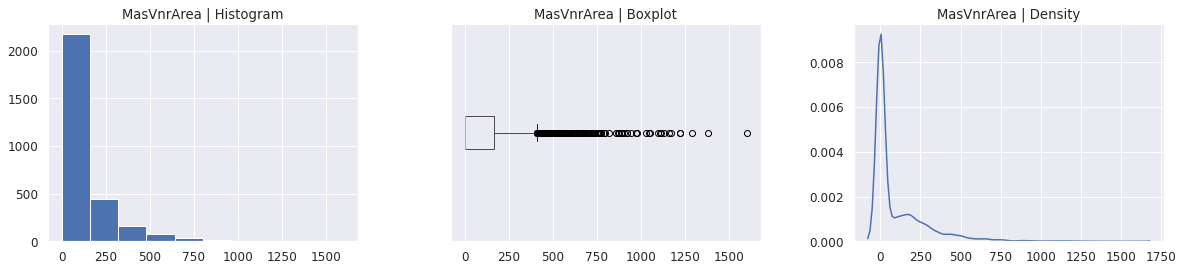

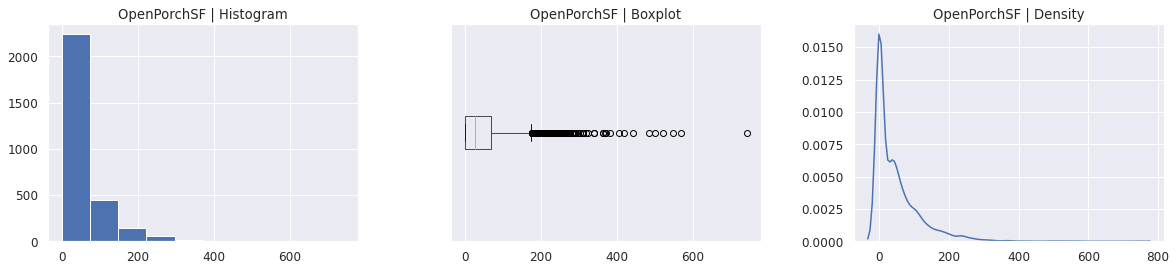

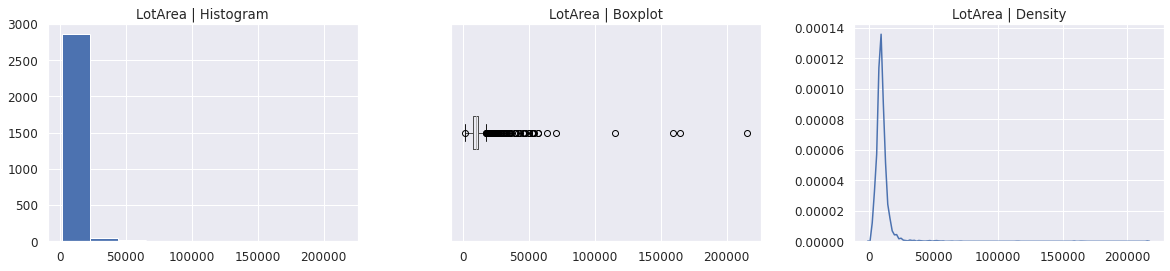

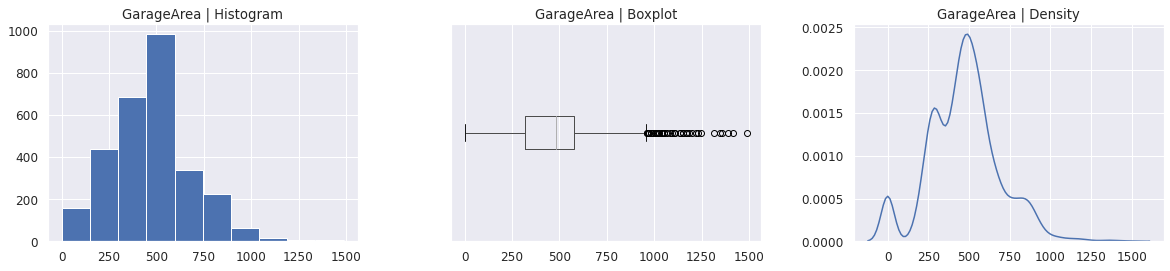

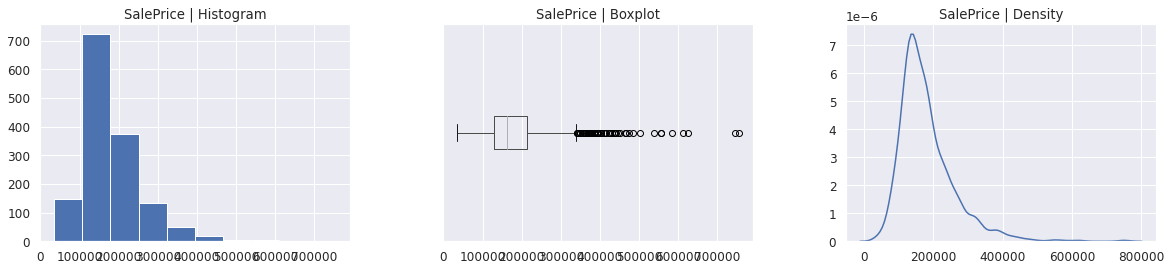

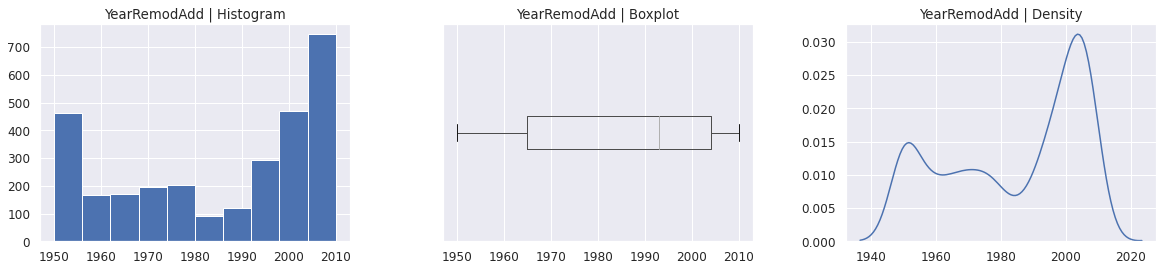

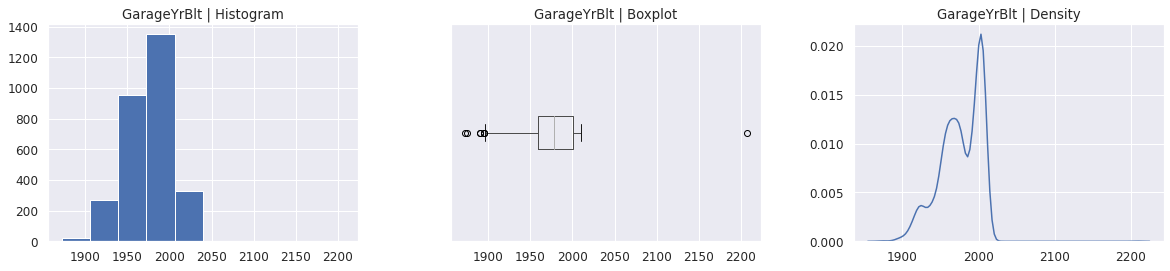

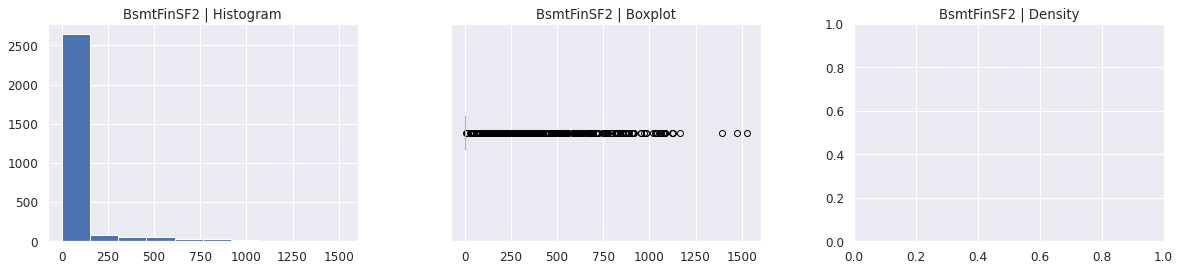

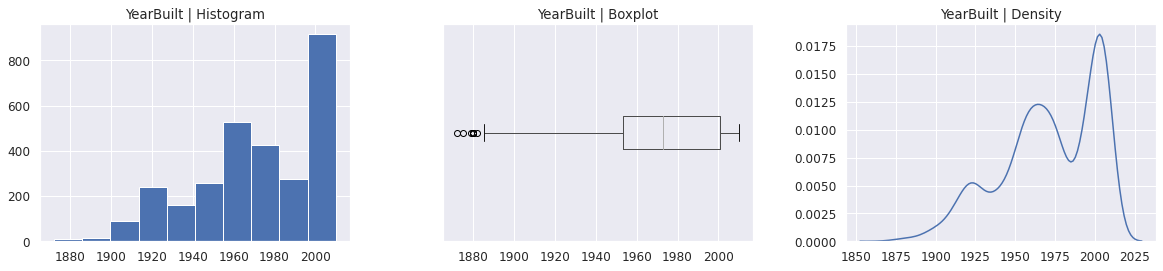

In [12]:
def num_plot(data, cat_length = 16, remove = ["Id"], hist_bins = 12, figsize = (20,4)):
    
    num_cols = [col for col in data.columns if data[col].dtypes != "O" 
                and len(data[col].unique()) >= cat_length]
    
    if len(remove) > 0:
        num_cols = list(set(num_cols).difference(remove))
            
    for i in num_cols:
        fig, axes = plt.subplots(1, 3, figsize = figsize)
        data.hist(str(i), bins = hist_bins, ax=axes[0])
        data.boxplot(str(i),  ax=axes[1], vert=False);
        try: 
            sns.kdeplot(np.array(data[str(i)]))
        except: ValueError
        
        axes[1].set_yticklabels([])
        axes[1].set_yticks([])
        axes[0].set_title(i + " | Histogram")
        axes[1].set_title(i + " | Boxplot")
        axes[2].set_title(i + " | Density")
        plt.show()
        
        
num_plot(df.drop(ordinal_vars, axis = 1), cat_length = 16, remove = ["Id"], hist_bins = 10, figsize = (20,4))

<a id='categoric'></a>
<h1 style="color:firebrick" >7. CATEGORIC VARIABLES</h1>

In [13]:
for i in ["Street", "Utilities", "LandSlope", "MiscFeature"]:
    print(df[i].value_counts())

Pave    2907
Grvl      12
Name: Street, dtype: int64
AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64


In [14]:
def cat_eda(data, cat_length, target = "SalePrice"):  
    dataframe = data.copy()
    
    #if len(ordinal_variable) > 0:
    #    dataframe.drop(ordinal_variable, axis = 1, inplace = True)
        
    more_cat_cols = [col for col in dataframe.columns if len(dataframe[col].unique()) < cat_length]
    
    for i in more_cat_cols: 
        print(i, ":", len(dataframe[i].value_counts()), "Unique Category -", str(dataframe[i].dtype))
        print(pd.DataFrame({"COUNT": dataframe[i].value_counts(),
                            "RATIO": dataframe[i].value_counts() / len(dataframe),
                            "TARGET_MEDIAN": dataframe.groupby(i)[target].median(),
                            "TARGET_COUNT": dataframe.groupby(i)[target].count(),
                            "TARGET_STD": dataframe.groupby(i)[target].std()}), end="\n\n\n")
    
    print("# DTYPES -----------------------------")
    print("Object Variables:",dataframe[more_cat_cols].select_dtypes("object").columns.tolist(), "\n")
    print("Integer Variables:",dataframe[more_cat_cols].select_dtypes("integer").columns.tolist(), "\n")
    print("Float Variables:",dataframe[more_cat_cols].select_dtypes("float").columns.tolist(), "\n")

cat_eda(df, cat_length=17)

MSSubClass : 16 Unique Category - int64
     COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
20    1079   0.37      159250.00           536    78782.19
30     139   0.05       99900.00            69    24857.11
40       6   0.00      142500.00             4    75747.80
45      18   0.01      107500.00            12    20231.72
50     287   0.10      132000.00           144    54851.98
60     575   0.20      215200.00           299    86579.91
70     128   0.04      156000.00            60    58206.55
75      23   0.01      163500.00            16   100556.76
80     118   0.04      166500.00            58    38197.81
85      48   0.02      140750.00            20    19629.94
90     109   0.04      135980.00            52    27833.25
120    182   0.06      192000.00            87    58221.49
150      1   0.00            nan             0         nan
160    128   0.04      146000.00            63    34587.54
180     17   0.01       88500.00            10    29474.28
190     61   0.0

In [15]:
# Remove Useless Variables
drop_list = ["Street", "Utilities", "LandSlope", "MiscFeature", "PoolArea"]


for col in drop_list:
    df.drop(col, axis=1, inplace=True)

<a id='fe'></a>
<h1 style="color:firebrick" >8. FEATURE ENGINEERING</h1>

In [16]:
df2 = df.copy()
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,None,4,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,4,3,PConc,5,4,2,7,706.00,2,0.00,150.00,856.00,GasA,5,Y,1,856,854,0,1710,1.00,0.00,2,1,3,1,4,8,8,0,1,Attchd,2003.00,RFn,2.00,548.00,4,4,Y,0,61,0,0,0,1,0,2,2008,WD,Normal,208500.00
1,2,20,RL,80.00,9600,None,4,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,3,3,CBlock,5,4,5,6,978.00,2,0.00,284.00,1262.00,GasA,5,Y,1,1262,0,0,1262,0.00,1.00,2,0,3,1,3,6,8,1,4,Attchd,1976.00,RFn,2.00,460.00,4,4,Y,298,0,0,0,0,1,0,5,2007,WD,Normal,181500.00
2,3,60,RL,68.00,11250,None,3,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,4,3,PConc,5,4,3,7,486.00,2,0.00,434.00,920.00,GasA,5,Y,1,920,866,0,1786,1.00,0.00,2,1,3,1,4,6,8,1,4,Attchd,2001.00,RFn,2.00,608.00,4,4,Y,0,42,0,0,0,1,0,9,2008,WD,Normal,223500.00
3,4,70,RL,60.00,9550,None,3,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,3,3,BrkTil,4,5,2,6,216.00,2,0.00,540.00,756.00,GasA,4,Y,1,961,756,0,1717,1.00,0.00,1,0,3,1,4,7,8,1,5,Detchd,1998.00,Unf,3.00,642.00,4,4,Y,0,35,272,0,0,1,0,2,2006,WD,Abnorml,140000.00
4,5,60,RL,84.00,14260,None,3,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,4,3,PConc,5,4,4,7,655.00,2,0.00,490.00,1145.00,GasA,5,Y,1,1145,1053,0,2198,1.00,0.00,2,1,4,1,4,9,8,1,4,Attchd,2000.00,RFn,3.00,836.00,4,4,Y,192,84,0,0,0,1,0,12,2008,WD,Normal,250000.00


**House Ratings: Using Ordinal Variables**

In [17]:
df2["TotalQual"] = df2[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1", 
                      "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageQual", "GarageCond", "Fence"]].sum(axis = 1)
df2["BsmtQual"] = df2[["BsmtCond", "BsmtFinType1", "BsmtFinType2"]].sum(axis = 1)
df2["TotalGarageQual"] = df2[["GarageQual", "GarageCond"]].sum(axis = 1)
df2["Overall"] = df2[["OverallQual", "OverallCond"]].sum(axis = 1)
df2["Exter"] = df2[["ExterQual", "ExterCond"]].sum(axis = 1)
df2["ExtraQual"] = df2[["Fence", "FireplaceQu", "Functional", "HeatingQC"]].sum(axis = 1)
df2["Qual"] = df2[["OverallQual", "ExterQual", "GarageQual", "Fence", "BsmtFinType1", "BsmtFinType2", "KitchenQual", "FireplaceQu"]].sum(axis = 1)
df2["Cond"] = df2[["OverallCond", "ExterCond", "GarageCond", "BsmtCond", "HeatingQC", "Functional"]].sum(axis = 1)

**Rare Category: Ordinal Variables**

In [18]:
cat_eda(df2[ordinal_vars+["SalePrice"]], cat_length=17)

LotShape : 4 Unique Category - int64
   COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
1     16   0.01      203570.00            10    82540.33
2     76   0.03      221000.00            41    99669.43
3    968   0.33      189000.00           484    85858.49
4   1859   0.64      146000.00           925    69673.43


OverallQual : 10 Unique Category - int64
    COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
1       4   0.00       50150.00             2    15344.22
2      13   0.00       60000.00             3    14254.20
3      40   0.01       86250.00            20    24688.57
4     226   0.08      108000.00           116    29022.00
5     825   0.28      133000.00           397    27107.33
6     731   0.25      160000.00           374    36090.18
7     600   0.21      200141.00           319    44466.26
8     342   0.12      269750.00           168    63898.90
9     107   0.04      345000.00            43    81278.17
10     31   0.01      432390.00            18   159785.

In [19]:
df2["LotShape"] = np.where(df2.LotShape == 1, 2, df2["LotShape"])

df2["OverallQual"] = np.where(df2.OverallQual.isin([1,2]), 3, df2["OverallQual"])

df2["OverallCond"] = np.where(df2.OverallCond.isin([1,2]), 3, df2["OverallCond"])
df2["OverallCond"] = np.where(df2.OverallCond.isin([7,8]), 6, df2["OverallCond"])

df2["ExterCond"] = np.where(df2.ExterCond.isin([1,2]), 0, 1)

df2["BsmtQual"] = np.where(df2.BsmtQual.isin([3,6]), 7, df2["BsmtQual"])
df2["BsmtQual"] = np.where(df2.BsmtQual.isin([17,18]), 16, df2["BsmtQual"])
df2["BsmtQual"] = np.where(df2.BsmtQual.isin([9,10,11]), 12, df2["BsmtQual"])

df2["BsmtCond"] = np.where(df2.BsmtCond == 1, 2, df2["BsmtCond"])

df2["HeatingQC"] = np.where(df2.HeatingQC == 1, 2, df2["HeatingQC"])

df2["Functional"] = np.where(df2.Functional == 8, 1, 0)

df2["GarageQual"] = np.where(df2.GarageQual == 1, 2, df2["GarageQual"])
df2["GarageQual"] = np.where(df2.GarageQual == 6, 5, df2["GarageQual"])

df2["GarageCond"] = np.where(df2.GarageCond == 1, 2, df2["GarageCond"])
df2["GarageCond"] = np.where(df2.GarageCond == 6, 5, df2["GarageCond"])

df2["Fence"] = np.where(df2.Fence.isin([2,4]), 3, df2["Fence"])

df2["Electrical"] = np.where(df2["Electrical"].isin([5, 4]), 3, df2["Electrical"])

In [20]:
cat_eda(df2[ordinal_vars+["SalePrice"]], cat_length=17)

LotShape : 3 Unique Category - int64
   COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
2     92   0.03      215000.00            51    96252.63
3    968   0.33      189000.00           484    85858.49
4   1859   0.64      146000.00           925    69673.43


OverallQual : 8 Unique Category - int64
    COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
3      57   0.02       81000.00            25    27012.10
4     226   0.08      108000.00           116    29022.00
5     825   0.28      133000.00           397    27107.33
6     731   0.25      160000.00           374    36090.18
7     600   0.21      200141.00           319    44466.26
8     342   0.12      269750.00           168    63898.90
9     107   0.04      345000.00            43    81278.17
10     31   0.01      432390.00            18   159785.49


OverallCond : 5 Unique Category - int64
   COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
3     67   0.02       85000.00            31    67594.85
4    101   0.03

In [21]:
# Total Floor
df2["TotalFlrSF"] = df2["1stFlrSF"] + df2["2ndFlrSF"]

# Total Finished Basement Area
df2["TotalBsmtFin"] = df2.BsmtFinSF1+df2.BsmtFinSF2

df2["BsmtFinRatio"] = (df2.TotalBsmtFin / df2.TotalBsmtSF).fillna(0)

# Is there a basement?
df2["Basement"] = np.where(df2.TotalBsmtSF < 1 , 0, 1)

# Porch Area
df2["PorchArea"] = df2.OpenPorchSF + df2.EnclosedPorch + df2.ScreenPorch + df2["3SsnPorch"] + df2.WoodDeckSF

# Total House Area
df2["TotalHouseArea"] = df2.TotalFlrSF + df2.TotalBsmtSF

df2["TotalSqFeet"] = df2.GrLivArea + df2.TotalBsmtSF


# Basement Rooms
df2["BsmtRoom"] = np.where((df2.BsmtFinSF1 > 0) & (df2.BsmtFinSF2 < 1), 1, np.nan)
df2["BsmtRoom"] = np.where((df2.BsmtFinSF1 < 1) & (df2.BsmtFinSF2 > 0 ), 1, df2["BsmtRoom"])
df2["BsmtRoom"] = np.where((df2.BsmtFinSF1 < 1) & (df2.BsmtFinSF2 < 1 ), 0, df2["BsmtRoom"])
df2["BsmtRoom"] = np.where((df2.BsmtFinSF1 > 0) & (df2.BsmtFinSF2 > 0 ), 2, df2["BsmtRoom"])


# Floor
df2["Floor"] = np.where((df2["2ndFlrSF"] < 1), 1, 2)


# Bath Room
df2["FullBath"] = np.where(df2.FullBath == 4, 3, df2.FullBath)
df2["BsmtFullBath"] = np.where(df2.BsmtFullBath == 3, 2, df2.BsmtFullBath)

df2["TotalFullBath"] = df2.BsmtFullBath + df2.FullBath
df2["TotalHalfBath"] = df2.BsmtHalfBath + df2.HalfBath

df2["TotalBath"] = df2["TotalFullBath"] + (df2["TotalHalfBath"]*0.5)
df2["TotalBath"] = np.where(df2.TotalBath.isin([6,7]), 5, df2.TotalBath)

# Fireplace
df2["Fireplaces"] = np.where(df2.Fireplaces > 3, 3, df2.Fireplaces)

# Garage
df2["GarageAreaRatio"] = (df2.GarageArea / df2.GarageCars).fillna(0)
df2["GarageCars"] = np.where(df2.GarageCars > 3, 3, df2.GarageCars)

# Rooms
df2["TotRmsAbvGrd"] = np.where(df2.TotRmsAbvGrd > 12, 12, df2.TotRmsAbvGrd)
df2["TotRmsAbvGrd"] = np.where(df2.TotRmsAbvGrd == 2, 3, df2.TotRmsAbvGrd)

# Lot Ratio
df2["LotRatio"] = df2.GrLivArea / df2.LotArea

df2["RatioArea"] = df2.TotalHouseArea / df2.LotArea

df2["GarageLotRatio"] = df2.GarageArea / df2.LotArea

# MasVnrArea
df2["MasVnrRatio"] = df2.MasVnrArea / df2.TotalHouseArea

# Dif Area
df2["DifArea"] = (df2.LotArea - df2["1stFlrSF"] - df2.GarageArea - df2.PorchArea - df2.WoodDeckSF)

# LowQualFinSF
df2["LowQualFinSFRatio"] = df2.LowQualFinSF / df2.TotalHouseArea



df2["OverallGrade"] = df2["OverallQual"] * df2["OverallCond"]
# Overall quality of the garage
df2["GarageGrade"] = df2["GarageQual"] * df2["GarageCond"]
# Overall quality of the exterior
df2["ExterGrade"] = df2["ExterQual"] * df2["ExterCond"]
# Overall kitchen score
df2["KitchenScore"] = df2["KitchenAbvGr"] * df2["KitchenQual"]
# Overall fireplace score
df2["FireplaceScore"] = df2["Fireplaces"] * df2["FireplaceQu"]


df2["HasMasVnrType"] = np.where(df2.MasVnrType == "None", 0, 1)
df2["BoughtOffPlan"] = np.where(df2.SaleCondition == "Partial", 1, 0)

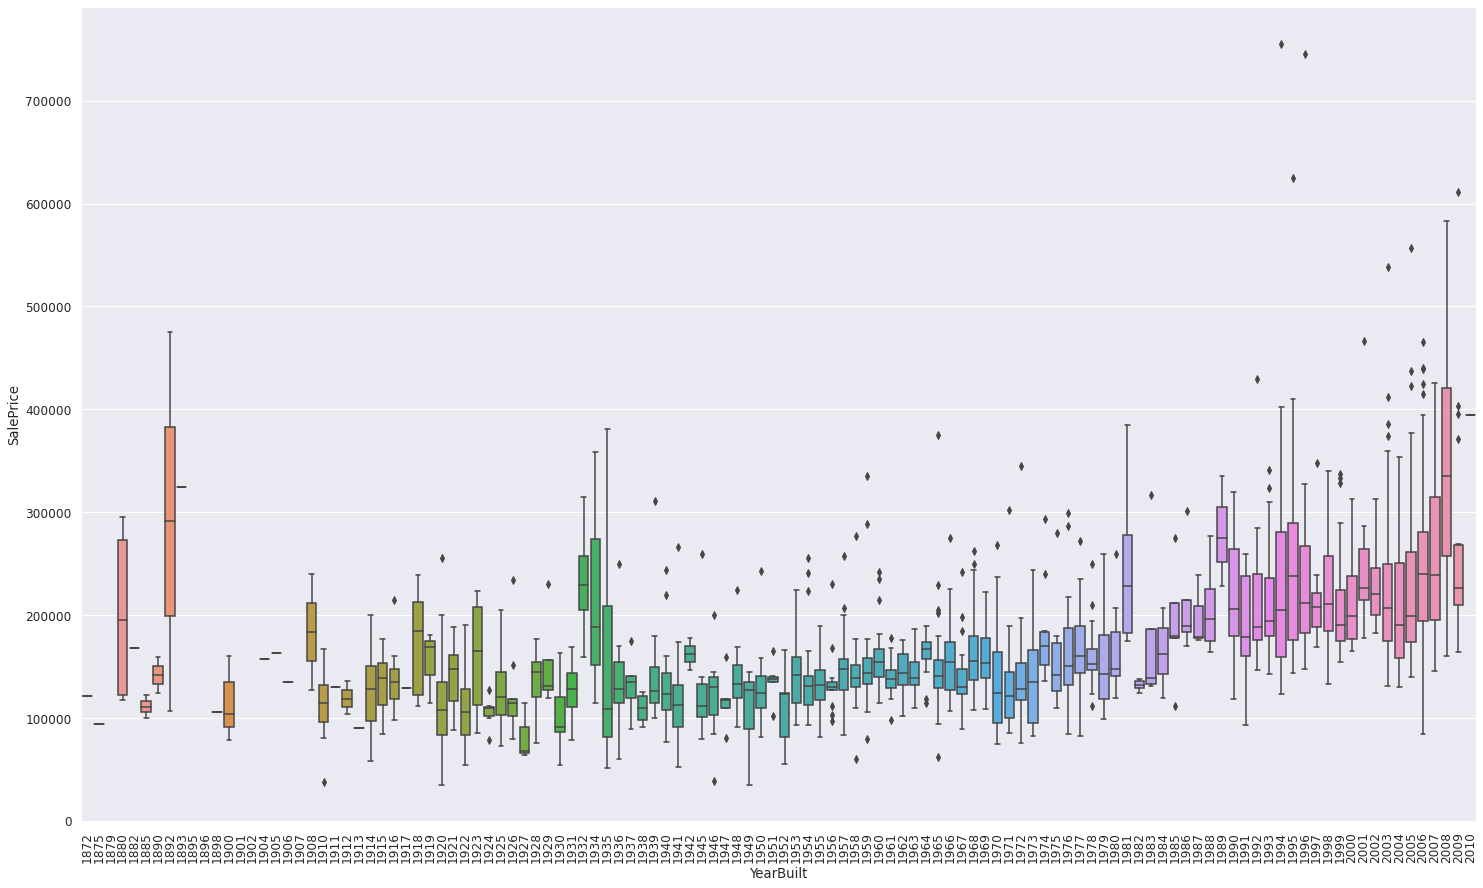

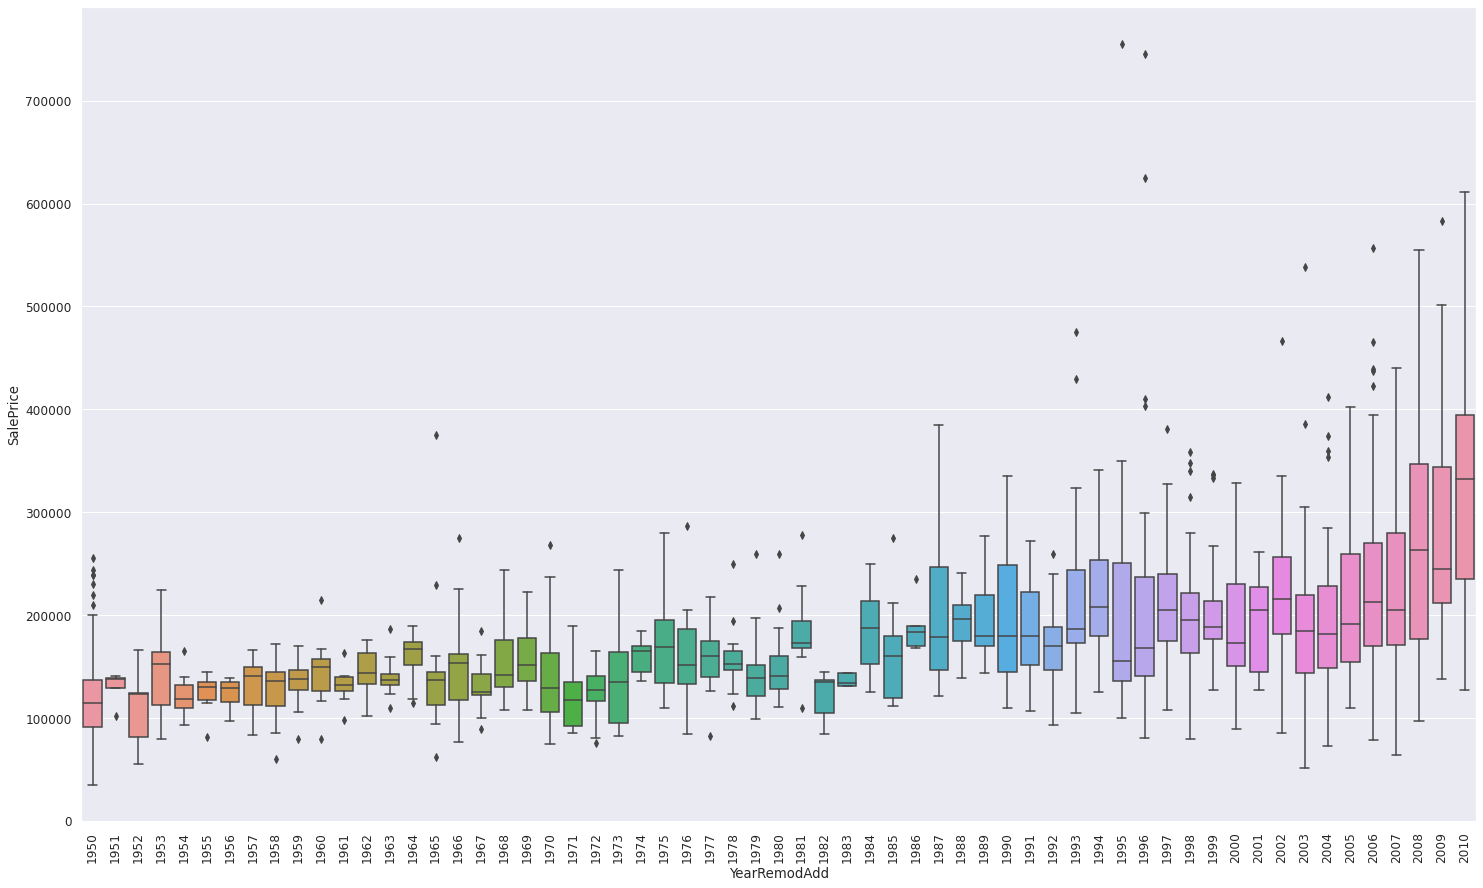

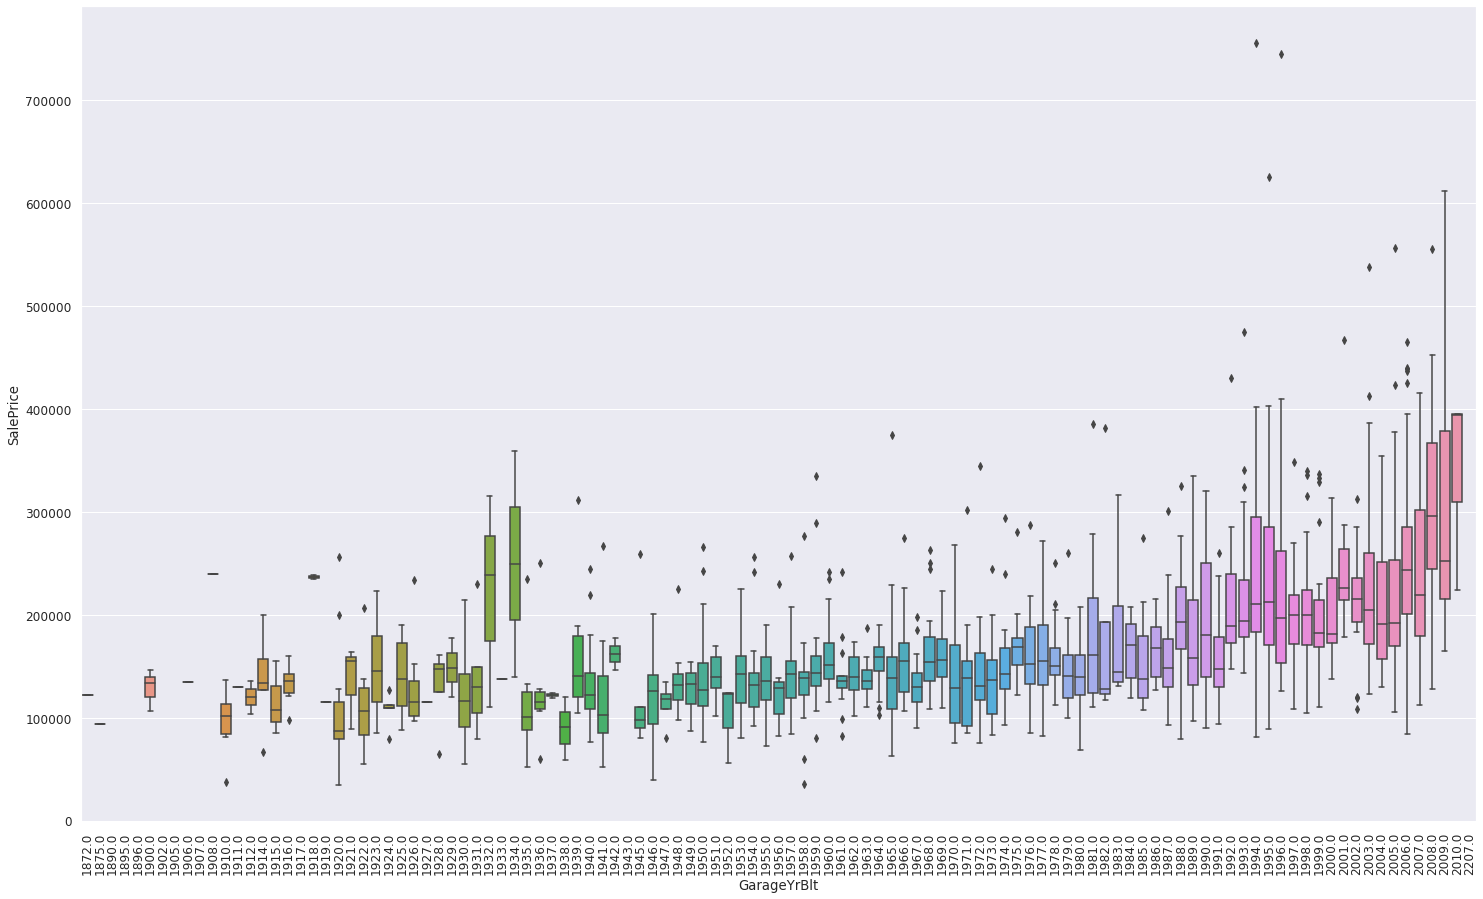

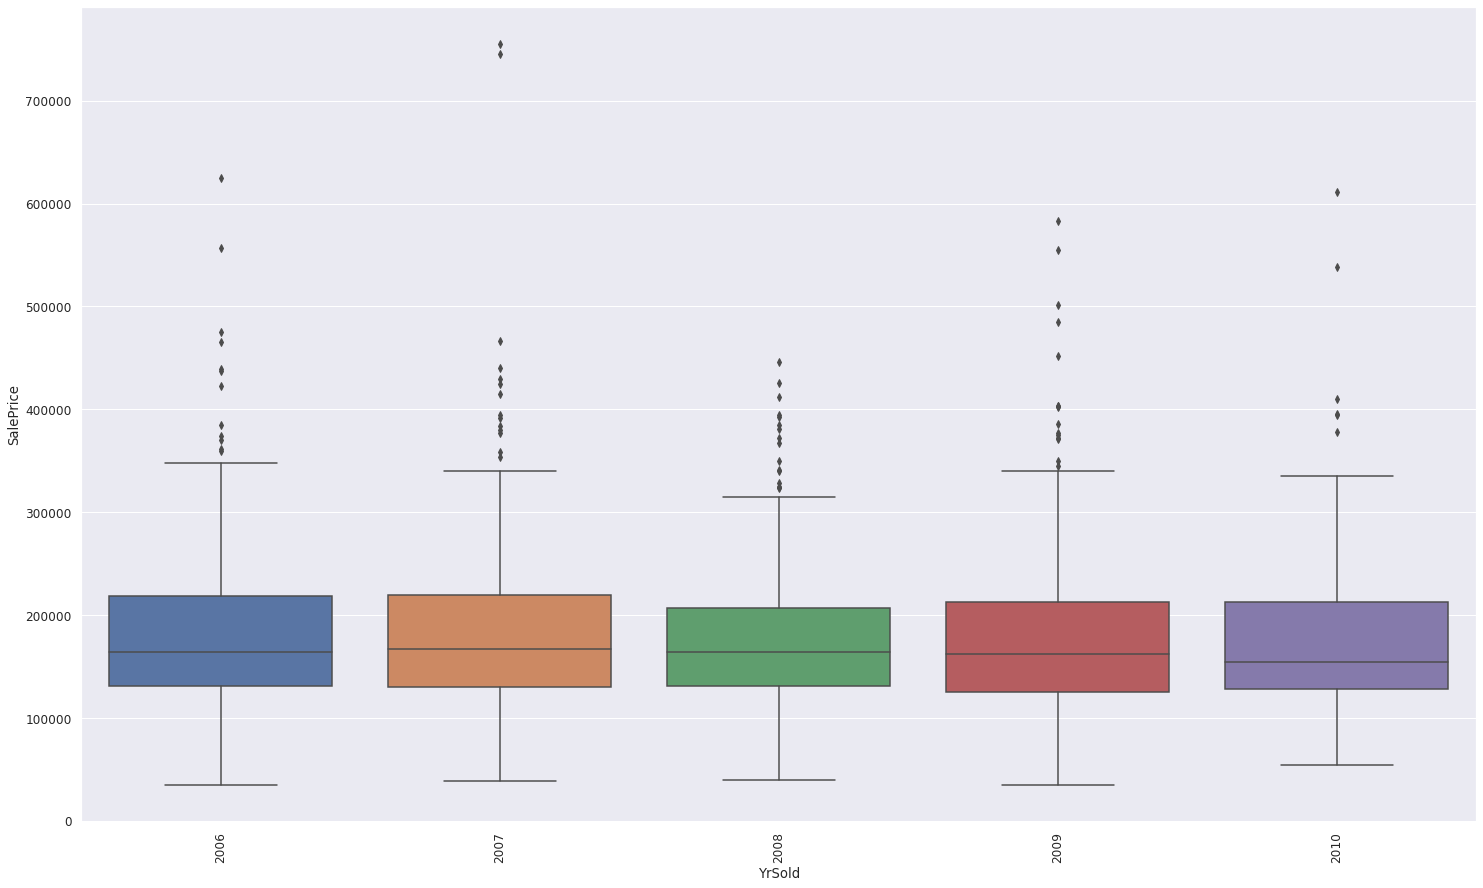

In [22]:
for i in ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]:
    plt.figure(figsize = (25,15))
    p = sns.boxplot(x = i, y = "SalePrice", data = df)
    for item in p.get_xticklabels():
        item.set_rotation(90)

In [23]:
df2.YearRemodAdd = np.where(df2.YearBuilt > df2.YearRemodAdd, df2.YearBuilt, df2.YearRemodAdd)
df2.YrSold = np.where(df2.YearBuilt > df2.YrSold, df2.YearBuilt, df2.YrSold)
df2.YrSold = np.where(df2.YearRemodAdd > df2.YrSold, df2.YearRemodAdd, df2.YrSold)

df2["Restoration"] = df2.YearRemodAdd - df2.YearBuilt
df2["HouseAge"] = df2.YrSold - df2.YearBuilt
df2["RestorationAge"] = df2.YrSold - df2.YearRemodAdd
df2["GarageAge"] = df2.GarageYrBlt - df2.YearBuilt
df2["GarageRestorationAge"] = np.abs(df2.GarageYrBlt - df2.YearRemodAdd)
df2["GarageSold"] = df2.YrSold - df2.GarageYrBlt

df2.GarageYrBlt = np.where(df2.GarageAge < 0, df2.YearBuilt, df2.GarageYrBlt)
df2.GarageYrBlt = np.where((df2.GarageYrBlt == 2207), df2.YearBuilt, df2.GarageYrBlt)
df2["GarageAge"] = df2.GarageYrBlt - df2.YearBuilt
df2["GarageSold"] = df2.YrSold - df2.GarageYrBlt


df2["Remodeled"] = np.where(df2.YearBuilt == df2.YearRemodAdd, 0 ,1)
df2["IsNewHouse"] = np.where(df2.YearBuilt == df2.YrSold, 1 ,0)



# YearBuiltCut
df2["YearBuiltCut"] = pd.cut(df2.YearBuilt, 15, labels = np.arange(1,16,1))
df2["GarageYearBuiltCut"] = pd.cut(df2.YearBuilt, 15, labels = np.arange(1,16,1))
df2["RemodAddCut"] = pd.cut(df2.YearRemodAdd, 10, labels = np.arange(1, 11, 1))

# Great Depression 1929-1939
df2["GreatDepression"] = np.where((df2.YearBuilt >=1929) & (df2.YearBuilt <= 1939), 1,0)
df2["BeforeGreatDepression"] = np.where((df2.YearBuilt <1929), 1,0)
# Mortgage Crisis
df2["Mortgage"] = np.where((df2.YearBuilt >=2007) & (df2.YearBuilt <= 2010), 1,0)
df2["MortgageRestoration"] = np.where((df2.YearRemodAdd >=2007) & (df2.YearRemodAdd <= 2010), 1,0)


for i in ["GreatDepression","BeforeGreatDepression", "Mortgage","MortgageRestoration"]:
    print(df2.groupby(i).SalePrice.agg(["count", "median"]), "\n")
    
    
df2.drop(["YearBuilt", "GarageYrBlt", "YearRemodAdd"], axis = 1, inplace = True)    

                 count    median
GreatDepression                 
0                 1402 165000.00
1                   58 127750.00 

                       count    median
BeforeGreatDepression                 
0                       1279 171000.00
1                        181 120000.00 

          count    median
Mortgage                 
0          1369 158000.00
1            91 253293.00 

                     count    median
MortgageRestoration                 
0                     1315 157900.00
1                      145 230000.00 



In [24]:
cat_eda(df2[set(df2.columns).difference(ordinal_vars)], cat_length=17)

Exterior2nd : 16 Unique Category - object
         COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
AsbShng     38   0.01      111000.00            20    42315.04
AsphShn      4   0.00      139000.00             3    37510.00
Brk Cmn     22   0.01      147000.00             7    38693.08
BrkFace     47   0.02      160000.00            25    95097.55
CBlock       3   0.00      105000.00             1         nan
CmentBd    126   0.04      238750.00            60   116140.40
HdBoard    406   0.14      155000.00           207    70061.08
ImStucc     15   0.01      187600.00            10   193176.67
MetalSd    447   0.15      138750.00           214    55078.60
Other        1   0.00      319000.00             1         nan
Plywood    270   0.09      160750.00           142    46955.74
Stone        6   0.00      177000.00             5    63533.07
Stucco      47   0.02      142000.00            26    74862.49
VinylSd   1015   0.35      200070.50           504    80708.31
Wd Sdng    39

In [25]:
ngb =df2.groupby("Neighborhood").SalePrice.median().reset_index()
ngb["Neighborhood_Clusters"] = pd.cut(df2.groupby("Neighborhood").SalePrice.median().values, 6, labels = np.arange(1,7,1))
df2 = pd.merge(df2, ngb.drop(["SalePrice"], axis = 1), how = "left", on = "Neighborhood").drop("Neighborhood", axis = 1)
df2["Neighborhood_Clusters"] = np.where(df2.Neighborhood_Clusters > 4, 5, df2.Neighborhood_Clusters)

del ngb

# Conditions
df2["Railroad"] = np.where((df2.Condition1.isin(["RRNn", "RRAn", "RRNe", "RRAe"])) | (df2.Condition2.isin(["RRNn", "RRAn", "RRNe", "RRAe"])), 1, 0)
df2["Park"] = np.where((df2.Condition1.isin(["PosN", "PosA"])) | (df2.Condition2.isin(["PosN", "PosA"])), 1, 0)
df2["Adjacent"] = np.where((df2.Condition1.isin(["PosA", "Artery", "Feedr", "RRAn", "RRAe"])) | (df2.Condition2.isin(["PosA", "Artery", "Feedr", "RRAn", "RRAe"])), 1, 0)
df2["Within"] = np.where((df2.Condition1.isin(["RRNn", "PosN", "RRNe"])) | (df2.Condition2.isin(["RRNn", "PosN", "RRNe"])), 1, 0)
df2["Norm"] = np.where((df2.Condition1.isin(["Norm"])) | (df2.Condition2.isin(["Norm"])), 1, 0)
df2["NorthSouth"] = np.where((df2.Condition1.isin(["RRNn", "RRAn"])) | (df2.Condition2.isin(["RRNn", "RRAn"])), 1, 0)
df2["EastWest"] = np.where((df2.Condition1.isin(["RRNe", "RRAe"])) | (df2.Condition2.isin(["RRNe", "RRAe"])), 1, 0)
df2["Road"] = np.where((df2.Condition1.isin(["Artery", "Feedr"])) | (df2.Condition2.isin(["Artery", "Feedr"])), 1, 0)

# Exterior
df2["Exterior1st"] = np.where((df2["Exterior1st"].isin(["Brk Cmn", "BrkComm"])) | (df2["Exterior2nd"].isin(["Brk Cmn", "BrkComm"])), "BrkComm",df2["Exterior1st"])
df2["Exterior2nd"] = np.where((df2["Exterior1st"].isin(["Brk Cmn", "BrkComm"])) | (df2["Exterior2nd"].isin(["Brk Cmn", "BrkComm"])), "BrkComm",df2["Exterior2nd"])
df2["Exterior1st"] = np.where((df2["Exterior1st"].isin(["CemntBd", "CmentBd"])) | (df2["Exterior2nd"].isin(["CemntBd", "CmentBd"])), "CmentBd",df2["Exterior1st"])
df2["Exterior2nd"] = np.where((df2["Exterior1st"].isin(["CemntBd", "CmentBd"])) | (df2["Exterior2nd"].isin(["CemntBd", "CmentBd"])), "CmentBd",df2["Exterior2nd"])
df2["Exterior1st"] = np.where((df2["Exterior1st"].isin(["Wd Shng", "WdShing"])) | (df2["Exterior2nd"].isin(["Wd Shng", "WdShing"])), "WdShing",df2["Exterior1st"])
df2["Exterior2nd"] = np.where((df2["Exterior1st"].isin(["Wd Shng", "WdShing"])) | (df2["Exterior2nd"].isin(["Wd Shng", "WdShing"])), "WdShing",df2["Exterior2nd"])

df2["SameExterior"] = np.where(df2.Exterior1st == df2.Exterior2nd, 1, 0)

ex = pd.merge(pd.DataFrame({"COUNT": df2["Exterior1st"].value_counts(),
                            "RATIO": df2["Exterior1st"].value_counts() / len(df2),
                            "TARGET_MEDIAN": df2.groupby("Exterior1st")["SalePrice"].median(),
                            "TARGET_COUNT": df2.groupby("Exterior1st")["SalePrice"].count()}).reset_index(),
           pd.DataFrame({"COUNT": df2["Exterior2nd"].value_counts(),
                            "RATIO2": df2["Exterior2nd"].value_counts() / len(df2),
                            "TARGET_MEDIAN2": df2.groupby("Exterior2nd")["SalePrice"].median(),
                            "TARGET_COUNT2": df2.groupby("Exterior2nd")["SalePrice"].count()}).reset_index(),
           how = "outer", on = "index").sort_values("index")
ex["ExteriorRank"] = pd.cut(ex.TARGET_MEDIAN, 4, labels = np.arange(1, 5, 1))
ex["ExteriorRank"] = np.where(ex["index"] == "Other", 4, ex["ExteriorRank"])

df2 = pd.merge(df2, ex[["index", "ExteriorRank"]].rename({"index":"Exterior1st", "ExteriorRank":"ExteriorRank1"}, axis = 1), how = "left", on = "Exterior1st")
df2 = pd.merge(df2, ex[["index", "ExteriorRank"]].rename({"index":"Exterior2nd", "ExteriorRank":"ExteriorRank2"}, axis = 1), how = "left", on = "Exterior2nd")
df2["TotalExteriorRank"] = df2["ExteriorRank1"]+df2["ExteriorRank2"]

del ex

# Heating
df2["Heating"] = np.where(df2.Heating.str.contains("Gas"), 1, 0)  

# MSZoning
df2["MSZoning_IsResidential"] = np.where(df2.MSZoning.isin(["RH", "RM", "RL"]), 1, 0)

# Sale Type
df2["SaleType_Cat"] = np.where(df2.SaleType.isin(["Con", "ConLD", "ConLI", "ConLw"]), "Con", df2.SaleType)
df2["SaleType_Cat"] = np.where(df2.SaleType.isin(["WD", "CWD", "VWD"]), "War", df2.SaleType_Cat)
df2["SaleType_Cat"] = np.where(df2.SaleType.isin(["COD"]), "Oth", df2.SaleType_Cat)

# MasVnrType
df2["MasVnrType"] = np.where(df2.MasVnrType.isin(["BrkCmn", "BrkFace"]), "Brk", df2.MasVnrType)
df2["HasMasVnr"] = np.where(df2.MasVnrType == "None", 0, 1)

# RoofMatl
df2["RoofMatl"] = np.where(df2.RoofMatl.isin(["CompShg"]), 1, 0)

df2["Foundation"] = np.where(df2["Foundation"] == "Stone", "BrkTil", df2["Foundation"])
df2["Foundation"] = np.where(df2["Foundation"] == "Wood", "PConc", df2["Foundation"])

# MSSubClass
df2["MSSubClass"] = np.where(df2.MSSubClass.isin([150]), 120, df2.MSSubClass)
df2["MSSubClass_AllAges"] = np.where(df2.MSSubClass.isin([40,45,50,75,90,150, 190]), 1, 0)
df2["MSSubClass_Newer"] = np.where(df2.MSSubClass.isin([20, 60, 120, 160]), 1, 0)
df2["MSSubClass_Older"] = np.where(df2.MSSubClass.isin([30, 70]), 1, 0)
df2["MSSubClass_AllStyles"] = np.where(df2.MSSubClass.isin([20, 90, 190]), 1, 0)
df2["MSSubClass_Pud"] = np.where(df2.MSSubClass.isin([150, 160, 180]), 1, 0)
df2["MSSubClass_SplitMultiLevel"] = np.where(df2.MSSubClass.isin([80,85, 180]), 1, 0)
df2["MSSubClass_1946"] = np.where(df2.MSSubClass.isin([20, 60, 120, 160]), 1, 0)
df2["MSSubClass_1945"] = np.where(df2.MSSubClass.isin([30, 70]), 1, 0)


# Building Type
df2["BldgType_Short"] = np.where(df2.BldgType.isin(['1Fam', '2fmCon']), "Fam", df2.BldgType)
df2["BldgType_Short"] = np.where(df2.BldgType.isin(['TwnhsE', 'Twnhs']), "Twnhs", df2.BldgType_Short)

# House Style
df2["HouseStyle_Floor"] = np.where(df2.HouseStyle.isin(["1Story"]), "1", "2")
df2["HouseStyle_Floor"] = np.where(df2.HouseStyle.isin(["1.5Fin", "1.5Unf"]), "1.5", df2["HouseStyle_Floor"])
df2["HouseStyle_Floor"] = np.where(df2.HouseStyle.isin(["2.5Fin", "2.5Unf"]), "2.5", df2["HouseStyle_Floor"])
df2["HouseStyle_Floor"] = np.where(df2.HouseStyle.isin(["SLvl", "SFoyer"]), "S", df2["HouseStyle_Floor"])

df2["HouseStyle_IsSplit"] = np.where(df2.HouseStyle.isin(["SLvl","SFoyer"]),1,0)


df2.drop(["MSSubClass", "Exterior1st", "Exterior2nd", "Condition1", "Condition2", "SaleType", "YrSold", "MoSold"], axis = 1, inplace = True)

In [26]:
cat_eda(df2[set(df2.columns).difference(ordinal_vars)], cat_length=17)

NorthSouth : 2 Unique Category - int64
   COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
0   2857   0.98      163000.00          1426    79649.41
1     62   0.02      168745.00            34    71272.85


GreatDepression : 2 Unique Category - int64
   COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
0   2802   0.96      165000.00          1402    79481.47
1    117   0.04      127750.00            58    70021.01


FullBath : 4 Unique Category - int64
   COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
0     12   0.00      145000.00             9   106083.81
1   1309   0.45      132375.00           650    41565.08
2   1530   0.52      196750.00           768    72446.81
3     68   0.02      320000.00            33   165185.46


GarageYearBuiltCut : 15 Unique Category - category
    COUNT  RATIO  TARGET_MEDIAN  TARGET_COUNT  TARGET_STD
1       8   0.00      123000.00             6    86935.42
2      10   0.00      124900.00             5    28162.51
3       8   0.00      

<a id='encode'></a>
<h1 style="color:firebrick" >9. LABEL & ONE-HOT ENCODER</h1>

In [27]:
def label_encoder(dataframe):
    from sklearn import preprocessing
    labelencoder = preprocessing.LabelEncoder()

    label_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"
                  and len(dataframe[col].value_counts()) == 2]

    for col in label_cols:
        dataframe[col] = labelencoder.fit_transform(dataframe[col])
    return dataframe

df2 = label_encoder(df2)




cat_cols = [col for col in df2.columns if df2[col].dtypes == 'O']

def one_hot_encoder(dataframe, categorical_cols, nan_as_category=True):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, dummy_na=nan_as_category, drop_first=True)
    new_columns = [c for c in dataframe.columns if c not in original_columns]
    return dataframe, new_columns


df2, new_cols_ohe = one_hot_encoder(df2, cat_cols, nan_as_category=False)

df2.shape

(2919, 181)

<a id='lgbm'></a>
<h1 style="color:firebrick" >10. LIGHT GBM</h1>

In [28]:
df2.head()

,Id,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,RoofMatl,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,SalePrice,TotalQual,TotalGarageQual,Overall,Exter,ExtraQual,Qual,Cond,TotalFlrSF,TotalBsmtFin,BsmtFinRatio,Basement,PorchArea,TotalHouseArea,TotalSqFeet,BsmtRoom,Floor,TotalFullBath,TotalHalfBath,TotalBath,GarageAreaRatio,LotRatio,RatioArea,GarageLotRatio,MasVnrRatio,DifArea,LowQualFinSFRatio,OverallGrade,GarageGrade,ExterGrade,KitchenScore,FireplaceScore,HasMasVnrType,BoughtOffPlan,Restoration,HouseAge,RestorationAge,GarageAge,GarageRestorationAge,GarageSold,Remodeled,IsNewHouse,YearBuiltCut,GarageYearBuiltCut,RemodAddCut,GreatDepression,BeforeGreatDepression,Mortgage,MortgageRestoration,Neighborhood_Clusters,Railroad,Park,Adjacent,Within,Norm,NorthSouth,EastWest,Road,SameExterior,ExteriorRank1,ExteriorRank2,TotalExteriorRank,MSZoning_IsResidential,HasMasVnr,MSSubClass_AllAges,MSSubClass_Newer,MSSubClass_Older,MSSubClass_AllStyles,MSSubClass_Pud,MSSubClass_SplitMultiLevel,MSSubClass_1946,MSSubClass_1945,HouseStyle_IsSplit,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_Cat_New,SaleType_Cat_Oth,SaleType_Cat_War,BldgType_Short_Fam,BldgType_Short_Twnhs,HouseStyle_Floor_1.5,HouseStyle_Floor_2,HouseStyle_Floor_2.5,HouseStyle_Floor_S
0,1,65.00,8450,4,7,5,1,196.00,4,1,13,4,2,7,706.00,2,0.00,150.00,856.00,1,5,1,1,856,854,0,1710,1.00,0.00,2,1,3,1,4,8,1,0,1,2.00,548.00,4,4,0,61,0,0,0,1,0,208500.00,59,8,12,7,15,30,29,1710,706.00,0.82,1,61,2566.00,2566.00,1.00,2,3.00,1.00,3.50,274.00,0.20,0.30,0.06,0.08,6985.00,0.00,35,16,4,4,0,1,0,0,5,5,0.00,0.00,5.00,0,0,15,15,9,0,0,0,0,3,0,0,0,0,1,0,0,0,1,3.00,3.00,6.00,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0
1,2,80.00,9600,4,6,6,1,0.00,3,1,12,4,5,6,978.00,2,0.00,284.00,1262.00,1,5,1,1,1262,0,0,1262,0.00,1.00,2,0,3,1,3,6,1,1,4,2.00,460.00,4,4,298,0,0,0,0,1,0,181500.00,61,8,14,6,18,29,32,1262,978.00,0.77,1,298,2524.00,2524.00,1.00,1,2.00,1.00,2.50,230.00,0.13,0.26,0.05,0.00,7282.00,0.00,36,16,3,3,4,0,0,0,31,31,0.00,0.00,31.00,0,0,12,12,5,0,0,0,0,4,0,0,1,0,1,0,0,1,1,1.00,1.00,2.00,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
2,3,68.00,11250,3,7,5,1,162.00,4,1,13,4,3,7,486.00,2,0.00,434.00,920.00,1,5,1,1,920,866,0,1786,1.00,0.00,2,1,3,1,4,6,1,1,4,2.00,608.00,4,4,0,42,0,0,0,1,0,223500.00,62,8,12,7,18,33,29,1786,486.00,0.53,1,42,2706.00,2706.00,1.00,2,3.00,1.00,3.50,304.00,0.16,0.24,0.05,0.06,9680.00,0.00,35,16,4,4,4,1,0,1,7,6,0.00,1.00,7.00,1,0,15,15,9,0,0,0,0,3,0,0,0,0,1,0,0,0,1,3.00,3.00,6.00,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,

## Holdout

In [29]:
### TRAIN - TEST
train_model = df2[df2.Id.isin(train.Id)]
test_model = df2[df2.Id.isin(test.Id)]
test_model.drop("SalePrice", axis = 1, inplace = True)


X = train_model.drop(['SalePrice', "Id"], axis=1)

y = train_model[["SalePrice"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)



######### MODEL: LGBM
import lightgbm as lgb
lgb_param = {
    # Configuration
    "nthread": -1,
    "objective": "regression",
    "metric": "rmse",
    "verbose": -1,
}

reg = lgb.LGBMRegressor(
    random_state=46, **lgb_param
)
reg.fit(X_train,y_train, 
        eval_set=[(X_train, y_train),(X_test, y_test)],
        eval_metric = ["rmse", "mae"],
        eval_names=["Train", "Valid"],
        early_stopping_rounds=10,
        verbose=10,
        categorical_feature='auto')

print("")
print("Train RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_train, reg.predict(X_train)))))
print("Train RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))), "\n")
print("Train MAE:", "{:,.2f}".format(mean_absolute_error(y_train, reg.predict(X_train))))
print("Valid MAE:", "{:,.2f}".format(mean_absolute_error(y_test, reg.predict(X_test))), "\n")
print("Train MAPE:", "{:,.2f}".format(mean_absolute_percentage_error(y_train, reg.predict(X_train))))
print("Valid MAPE:", "{:,.2f}".format(mean_absolute_percentage_error(y_test, reg.predict(X_test))), "\n")
print("Train R^2:", "{:,.2f}".format(r2_score(y_train, reg.predict(X_train))))
print("Valid R^2:", "{:,.2f}".format(r2_score(y_test, reg.predict(X_test))))

Training until validation scores don't improve for 10 rounds
[10]	Train's l1: 24080.9	Train's rmse: 37054.4	Valid's l1: 26067.1	Valid's rmse: 40067.1
[20]	Train's l1: 13455.5	Train's rmse: 23857.2	Valid's l1: 17402.3	Valid's rmse: 28023.8
[30]	Train's l1: 10102.4	Train's rmse: 19511.1	Valid's l1: 15414.4	Valid's rmse: 24240.2
[40]	Train's l1: 8596.77	Train's rmse: 17532	Valid's l1: 14888.4	Valid's rmse: 22984.2
[50]	Train's l1: 7622.03	Train's rmse: 15838.7	Valid's l1: 14939.8	Valid's rmse: 22552
Early stopping, best iteration is:
[44]	Train's l1: 8156.41	Train's rmse: 16776.4	Valid's l1: 14853.6	Valid's rmse: 22635.6

Train RMSE: 16,776.39
Train RMSE: 22,635.55 

Train MAE: 8,156.41
Valid MAE: 14,853.58 

Train MAPE: 48.95
Valid MAPE: 47.43 

Train R^2: 0.96
Valid R^2: 0.92


## Cross Validation

In [30]:
lgb_param = {
    # Configuration
    "nthread": -1,
    "objective": "regression",
    "metric": "rmse",
    "verbose": -1,
}

reg = lgb.LGBMRegressor(
    random_state=46, **lgb_param
)
reg.fit(X,y)


print("Train RMSE:","{:,.2f}".format(np.sqrt(mean_squared_error(y, reg.predict(X)))))
print("Train MAE:", "{:,.2f}".format(mean_absolute_error(y, reg.predict(X))), "\n")

print("CV RMSE:", "{:,.2f}".format(np.sqrt(-cross_val_score(reg, X, y, cv=10, scoring="neg_mean_squared_error")).mean()))
print("CV MAE:", "{:,.2f}".format(-cross_val_score(reg, X, y, cv=10, scoring="neg_mean_absolute_error").mean()))

Train RMSE: 10,097.09
Train MAE: 5,248.75 

CV RMSE: 27,275.51
CV MAE: 15,924.50


## Feature Importance

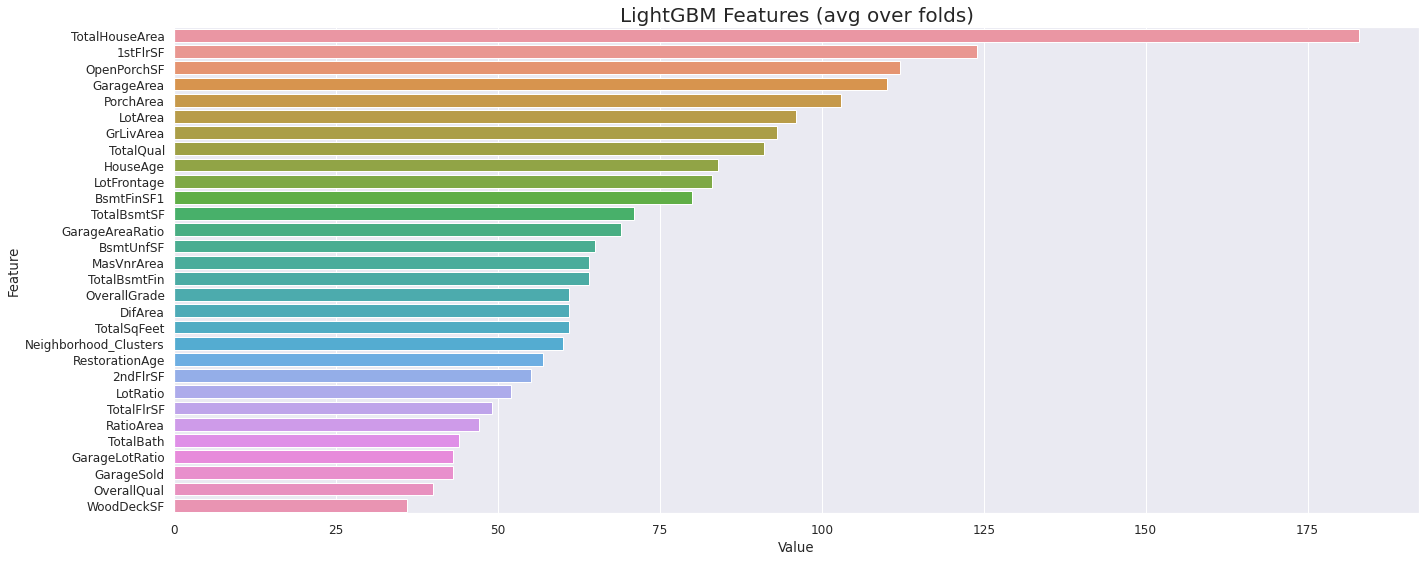

In [31]:
def plotImp(model, X , num = 30, figsize=(20, 8)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=figsize)

    p = sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                                      ascending=False)[0:num])
    p.axes.set_title('LightGBM Features (avg over folds)',fontsize=20)
    plt.tight_layout()
    #plt.savefig('lgbm_importances-01.png')
    plt.show()
    
plotImp(reg, X)

<a id='tuning'></a>
<h1 style="color:firebrick" >11. MODEL TUNING - RANDOM SEARCH</h1>

## Holdout + Cross Validation

In [32]:
# Benchmark
#------------------------------
lgb_param = {
    # Configuration
    "nthread": -1,
    "objective": "regression",
    "metric": "rmse",
    "verbose": -1
}

reg = lgb.LGBMRegressor(
    random_state=46, **lgb_param
)
reg.fit(X_train,y_train)


print("Train RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_train, reg.predict(X_train)))))
print("Train MAE:", "{:,.2f}".format(mean_absolute_error(y_train, reg.predict(X_train))), "\n")

print("CV RMSE:", "{:,.2f}".format(np.sqrt(-cross_val_score(reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error")).mean()))
print("CV MAE:", "{:,.2f}".format(-cross_val_score(reg, X_train, y_train, cv=10, scoring="neg_mean_absolute_error").mean()), "\n")

print("Valid RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))))
print("Valid MAE:", "{:,.2f}".format(mean_absolute_error(y_test, reg.predict(X_test))), "\n")

Train RMSE: 10,990.27
Train MAE: 4,848.46 

CV RMSE: 29,803.23
CV MAE: 17,112.49 

Valid RMSE: 23,013.82
Valid MAE: 15,098.06 



## Randomized Search CV

In [33]:
# Tuned
#------------------------------

params = {
    # Training 
    'learning_rate': [0.1, 0.09, 0.08, 0.07, 0.05],
    # Tree
    'max_depth': [-1] + np.arange(5, 36, 1),
    # Deal with Over-fitting
    'num_leaves':np.arange(20, 81, 1),
    'n_estimators':[50, 100, 500, 1000, 3000, 5000, 10000], 
    'max_bin':np.arange(150, 301, 1), # Default 255
    'min_data_in_leaf':np.arange(15, 61, 1), # Default 20
    "feature_fraction_seed":np.arange(2, 1001, 1),
    "feature_fraction":np.arange(0.1, 1.01, 0.01),#[0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 1], #0.41,# Default: 1 
    "bagging_freq":[0], # Default: 0 | Note: to enable bagging, bagging_freq should be set to a non zero value as well
    "bagging_fraction":[1], # Default: 1 
    "min_data_in_leaf":np.arange(20, 101, 1), # Default: 20 
    "min_sum_hessian_in_leaf":[1e-2,1e-3, 1e-4, 1e-5, 1e-6], # Default: 1e-3 
    # Regularization
    # - Try lambda_l1, lambda_l2 and min_gain_to_split for regularization
    "lambda_l1":np.arange(0.0, 1.1, 0.1),
    "lambda_l2":np.arange(0.0, 1.1, 0.1),
    "min_gain_to_split ": np.arange(0, 101, 1)  # Default: 0
}


reg = lgb.LGBMRegressor(
    random_state=46, objective = "rmse", metric = "rmse"
)

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(reg, params, random_state=46, n_jobs=-1, cv = 10, scoring = "neg_mean_squared_error")
rs_lgbm = rs.fit(X_train, y_train,
                 eval_set=[(X_train, y_train),(X_test, y_test)],
                 eval_metric = ["rmse", "mae"],
                 eval_names=["Train"],
                 early_stopping_rounds=10,
                 verbose=10,
                 categorical_feature='auto')

print("")
print("Train RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_train, rs_lgbm.predict(X_train)))))
print("Train MAE:", "{:,.2f}".format(mean_absolute_error(y_train, rs_lgbm.predict(X_train))), "\n")

print("CV RMSE:", "{:,.2f}".format(np.sqrt(-rs_lgbm.cv_results_["mean_test_score"]).mean()))
print("CV RMSE STD:", "{:,.2f}".format(np.sqrt(rs_lgbm.cv_results_["std_test_score"]).mean()), "\n")

print("Test RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test, rs_lgbm.predict(X_test)))))
print("Test MAE:", "{:,.2f}".format(mean_absolute_error(y_test, rs_lgbm.predict(X_test))), "\n\n")

print("--------------------------------------")
print("# BEST PARAMETERS")
print("--------------------------------------")
print(rs_lgbm.best_params_)

Training until validation scores don't improve for 10 rounds
[10]	Train's l1: 25542.5	Train's rmse: 40364.7	valid_1's l1: 26402.4	valid_1's rmse: 42668.6
[20]	Train's l1: 15844.3	Train's rmse: 28553	valid_1's l1: 17709	valid_1's rmse: 31126.4
[30]	Train's l1: 13042.4	Train's rmse: 24993.9	valid_1's l1: 15870.8	valid_1's rmse: 27286.4
[40]	Train's l1: 12064.8	Train's rmse: 23286.6	valid_1's l1: 15344.3	valid_1's rmse: 25649.2
[50]	Train's l1: 11480	Train's rmse: 22224.9	valid_1's l1: 15183.2	valid_1's rmse: 24970.6
[60]	Train's l1: 11016.6	Train's rmse: 21441.5	valid_1's l1: 15010.6	valid_1's rmse: 24332.9
[70]	Train's l1: 10689.5	Train's rmse: 20671.7	valid_1's l1: 14933.2	valid_1's rmse: 23984.6
[80]	Train's l1: 10356.6	Train's rmse: 19855.7	valid_1's l1: 14942.6	valid_1's rmse: 23611.4
Early stopping, best iteration is:
[72]	Train's l1: 10621.8	Train's rmse: 20509.7	valid_1's l1: 14870.8	valid_1's rmse: 23847.9

Train RMSE: 20,509.71
Train MAE: 10,621.78 

CV RMSE: 29,983.77
CV RMSE 

In [34]:
# Tuned
#------------------------------

params = {
    # Training 
    'learning_rate': [0.1, 0.09, 0.08, 0.07, 0.05],
    # Tree
    'max_depth': [-1] + np.arange(5, 16, 1),
    # Deal with Over-fitting
    'num_leaves':np.arange(50, 71, 1),
    'n_estimators':[50, 100, 500, 1000, 3000, 5000, 10000], 
    'max_bin':np.arange(140, 171, 1), # Default 255
    'min_data_in_leaf':np.arange(15, 61, 1), # Default 20
    "feature_fraction_seed":[334],
    "feature_fraction":np.arange(0.1, 1.01, 0.01),#[0.4, 0.5, 0.6, 0.7, 0.8, 0.8, 1], #0.41,# Default: 1 
    "bagging_freq":[0], # Default: 0 | Note: to enable bagging, bagging_freq should be set to a non zero value as well
    "bagging_fraction":[1], # Default: 1 
    "min_data_in_leaf":np.arange(30, 51, 1), # Default: 20 
    "min_sum_hessian_in_leaf":[1e-2,1e-3, 1e-4, 1e-5, 1e-6], # Default: 1e-3 
    # Regularization
    # - Try lambda_l1, lambda_l2 and min_gain_to_split for regularization
    "lambda_l1":np.arange(0.0, 1.1, 0.1),
    "lambda_l2":np.arange(0.0, 1.1, 0.1),
    "min_gain_to_split ": np.arange(80, 111, 1)  # Default: 0
}


reg = lgb.LGBMRegressor(
    random_state=46, objective = "rmse", metric = "rmse"
)

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(reg, params, random_state=46, n_jobs=-1, cv = 10, scoring = "neg_mean_squared_error")
rs_lgbm = rs.fit(X_train, y_train,
                 eval_set=[(X_train, y_train),(X_test, y_test)],
                 eval_metric = ["rmse", "mae"],
                 eval_names=["Train"],
                 early_stopping_rounds=10,
                 verbose=10,
                 categorical_feature='auto')

print("")
print("Train RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_train, rs_lgbm.predict(X_train)))))
print("Train MAE:", "{:,.2f}".format(mean_absolute_error(y_train, rs_lgbm.predict(X_train))), "\n")

print("CV RMSE:", "{:,.2f}".format(np.sqrt(-rs_lgbm.cv_results_["mean_test_score"]).mean()))
print("CV RMSE STD:", "{:,.2f}".format(np.sqrt(rs_lgbm.cv_results_["std_test_score"]).mean()), "\n")

print("Test RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test, rs_lgbm.predict(X_test)))))
print("Test MAE:", "{:,.2f}".format(mean_absolute_error(y_test, rs_lgbm.predict(X_test))), "\n\n")

print("--------------------------------------")
print("# BEST PARAMETERS")
print("--------------------------------------")
print(rs_lgbm.best_params_)

Training until validation scores don't improve for 10 rounds
[10]	Train's l1: 25683.7	Train's rmse: 40702.3	valid_1's l1: 26924.1	valid_1's rmse: 43324.4
[20]	Train's l1: 15786.7	Train's rmse: 28941.8	valid_1's l1: 17973	valid_1's rmse: 31660.1
[30]	Train's l1: 13037.9	Train's rmse: 25357.5	valid_1's l1: 15896.5	valid_1's rmse: 27625.8
[40]	Train's l1: 11865	Train's rmse: 23743.7	valid_1's l1: 15006.1	valid_1's rmse: 25832.7
[50]	Train's l1: 11118.8	Train's rmse: 22497.2	valid_1's l1: 14793.2	valid_1's rmse: 24721.5
[60]	Train's l1: 10475.8	Train's rmse: 21519.7	valid_1's l1: 14695	valid_1's rmse: 24304.9
[70]	Train's l1: 9952.48	Train's rmse: 20658.7	valid_1's l1: 14768.2	valid_1's rmse: 24159.4
[80]	Train's l1: 9472.34	Train's rmse: 19858.1	valid_1's l1: 14559.7	valid_1's rmse: 23580.9
[90]	Train's l1: 9043.01	Train's rmse: 19127.3	valid_1's l1: 14579.3	valid_1's rmse: 23349.6
Early stopping, best iteration is:
[84]	Train's l1: 9257.14	Train's rmse: 19524.1	valid_1's l1: 14530.2	vali

<a id='error'></a>
<h1 style="color:firebrick" >12. ERROR ANALYSIS</h1>

In [35]:
res = pd.DataFrame({"Actual":y_test.SalePrice, "Pred":rs_lgbm.predict(X_test)})
res["Error"] = res.Actual - res.Pred
res["AbsoluteError"] = np.abs(res.Error)
res.sort_values("AbsoluteError", ascending = False)

,Actual,Pred,Error,AbsoluteError
1169,625000.00,473977.54,151022.46,151022.46
898,611657.00,461899.35,149757.65,149757.65
1046,556581.00,418855.58,137725.42,137725.42
1142,424870.00,340415.28,84454.72,84454.72
93,133900.00,198681.80,-64781.80,64781.80
...,...,...,...,...
984,126000.00,126135.51,-135.51,135.51
665,230500.00,230613.47,-113.47,113.47
226,290000.00,289907.77,92.23,92.23
1354,235000.00,235036.96,-36.96,36.96


In [36]:
res.sort_values("AbsoluteError", ascending = False).head(20)

,Actual,Pred,Error,AbsoluteError
1169,625000.00,473977.54,151022.46,151022.46
898,611657.00,461899.35,149757.65,149757.65
1046,556581.00,418855.58,137725.42,137725.42
1142,424870.00,340415.28,84454.72,84454.72
93,133900.00,198681.80,-64781.80,64781.80
1349,122000.00,180928.22,-58928.22,58928.22
320,342643.00,398698.75,-56055.75,56055.75
664,423000.00,370398.35,52601.65,52601.65
692,335000.00,285294.47,49705.53,49705.53
1032,310000.00,359314.08,-49314.08,49314.08


In [37]:
res.describe([0.01, 0.05, 0.10, 0.20, 0.40, 0.70, 0.80, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,40%,50%,70%,80%,90%,95%,99%,max
Actual,292.00,183322.96,80726.66,39300.00,59639.37,93335.00,110000.00,125100.00,145940.00,167370.00,202500.00,238600.00,275000.00,322250.00,473242.29,625000.00
Pred,292.00,181672.31,72861.88,62079.76,74385.07,92857.76,108567.42,125260.85,146617.50,167708.25,206688.73,228817.66,265340.86,332912.87,420254.92,473977.54
Error,292.00,1650.66,23480.45,-64781.80,-49920.83,-29302.15,-20058.22,-12224.65,-1578.48,858.06,7321.60,12157.84,23193.95,30757.83,89249.08,151022.46
AbsoluteError,292.00,14530.19,18499.01,18.67,111.56,462.85,1254.23,2968.96,7378.20,10300.59,15564.97,21103.29,30200.80,43359.83,89249.08,151022.46


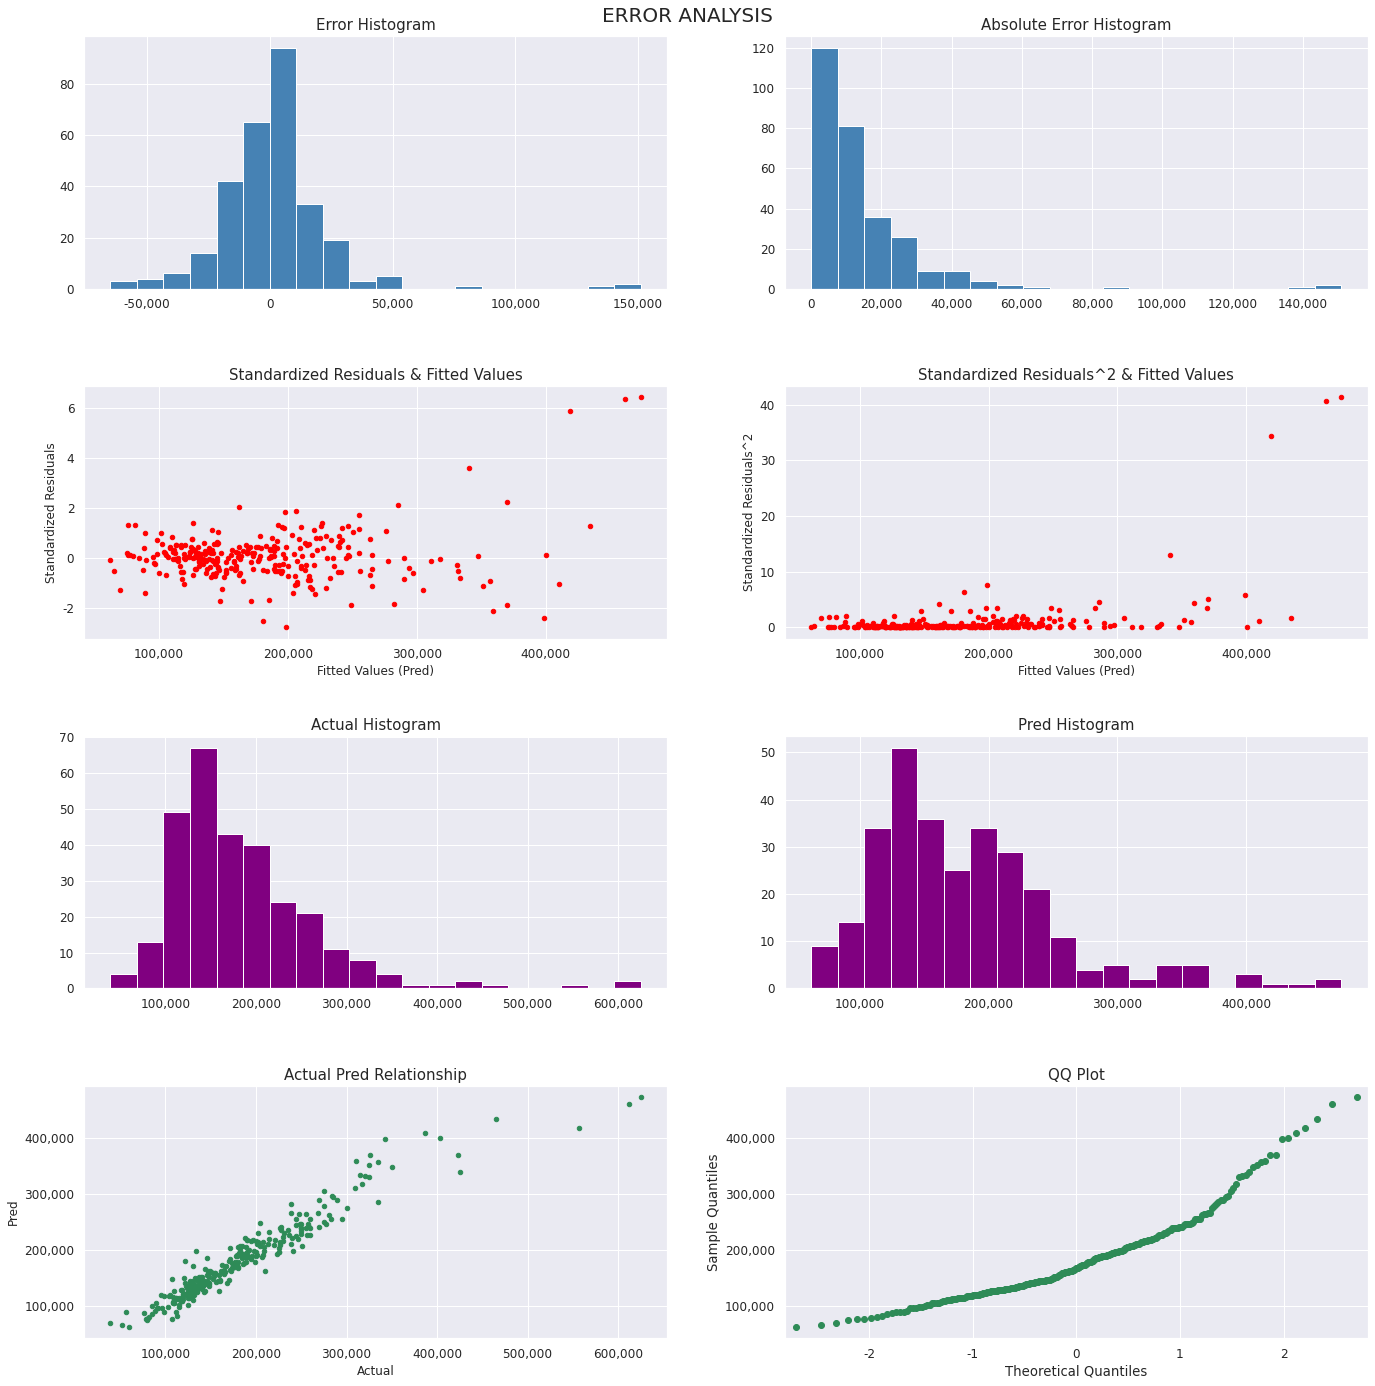

In [38]:
fig, axes = plt.subplots(4, 2, figsize = (20,20))

for axi in axes.flat:
    axi.ticklabel_format(style="sci", axis="y", scilimits=(0,10))
    axi.ticklabel_format(style="sci", axis="x", scilimits=(0,10))
    axi.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    axi.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    
res.hist("Error", ax = axes[0, 0], color = "steelblue", bins = 20)
res.hist("AbsoluteError", ax = axes[0,1], color = "steelblue", bins = 20)
sr = res.copy()
sr["StandardizedR"] = (sr.Error / sr.Error.std())
sr["StandardizedR2"] = ((sr.Error / sr.Error.std())**2)
sr.plot.scatter(x = "Pred",y = "StandardizedR", color = "red", ax = axes[1,0])
sr.plot.scatter(x = "Pred",y = "StandardizedR2", color = "red", ax = axes[1,1])
res.Actual.hist(ax = axes[2, 0], color = "purple", bins = 20)
res.Pred.hist(ax = axes[2, 1], color = "purple", bins = 20)
res.plot.scatter(x = "Actual",y = "Pred", color = "seagreen", ax = axes[3,0]);
# QQ Plot
import statsmodels.api as sm
import pylab
sm.qqplot(sr.Pred, ax = axes[3,1], c = "seagreen")
plt.suptitle("ERROR ANALYSIS", fontsize = 20)
axes[0,0].set_title("Error Histogram", fontsize = 15)
axes[0,1].set_title("Absolute Error Histogram", fontsize = 15)
axes[1,0].set_title("Standardized Residuals & Fitted Values", fontsize = 15)
axes[1,1].set_title("Standardized Residuals^2 & Fitted Values", fontsize = 15)
axes[2,0].set_title("Actual Histogram", fontsize = 15)
axes[2,1].set_title("Pred Histogram", fontsize = 15);
axes[3,0].set_title("Actual Pred Relationship", fontsize = 15);
axes[3,1].set_title("QQ Plot", fontsize = 15);
axes[1,0].set_xlabel("Fitted Values (Pred)", fontsize = 12)
axes[1,1].set_xlabel("Fitted Values (Pred)", fontsize = 12)
axes[3,0].set_xlabel("Actual", fontsize = 12)
axes[1,0].set_ylabel("Standardized Residuals", fontsize = 12)
axes[1,1].set_ylabel("Standardized Residuals^2", fontsize = 12)
axes[3,0].set_ylabel("Pred", fontsize = 12)
fig.tight_layout(pad=3.0)
plt.savefig("errors.png")


<a id='final'></a>
<h1 style="color:firebrick" >13. FINAL MODEL & SUBMISSION</h1>

In [39]:
# Tüm Veri

### TRAIN - TEST
train_model = df2[df2.Id.isin(train.Id)]
test_model = df2[df2.Id.isin(test.Id)]
test_model.drop("SalePrice", axis = 1, inplace = True)


X = train_model.drop(['SalePrice', "Id"], axis=1)
y = train_model[["SalePrice"]]

final = lgb.LGBMRegressor(
    random_state=46, objective = "regression", metric = "rmse",
    **rs_lgbm.best_params_
)

final.fit(X,y, 
        eval_set=[(X,y)],
        eval_metric = ["rmse", "mae"],
        eval_names=["Train"],
        early_stopping_rounds=10,
        verbose=1000,
        categorical_feature='auto')


submission = pd.DataFrame({"Id": test_model.Id, "SalePrice":final.predict(test_model.drop("Id", axis = 1))})
submission.to_csv("submission.csv", index = None)

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	Train's l1: 8442.7	Train's rmse: 16853.8


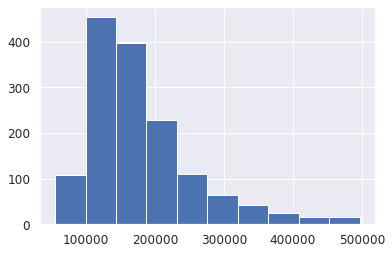

In [40]:
submission.SalePrice.hist();

In [41]:
submission

,Id,SalePrice
1460,1461,115131.57
1461,1462,170585.63
1462,1463,184936.63
1463,1464,188676.15
1464,1465,189982.72
...,...,...
2914,2915,79910.00
2915,2916,85930.39
2916,2917,175204.61
2917,2918,125281.46
